## Name:VishnuPrasad B
## Date Of Submission :13-MAY-2024


# Medical Insurance Cost Prediction

#### Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve
#### patient care by understanding the factors influencing medical costs for its patients. To achieve
#### this, Hospital ABC has collected a comprehensive dataset containing information about patients'
#### demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes
#### such as age, gender, BMI, smoking status, region, as well as additional information like
#### occupation, exercise frequency, chronic conditions, and more.

### Introduction:
In today's healthcare landscape, understanding the intricate factors that influence medical costs is imperative for healthcare providers to optimize resource allocation and enhance patient care. Hospital ABC, a leading healthcare provider, recognizes this necessity and has embarked on a mission to delve deep into the dynamics of medical expenses. To achieve this goal, Hospital ABC has meticulously compiled a comprehensive dataset encompassing a myriad of patient attributes, ranging from demographics and lifestyle choices to health status and chronic conditions.

### Overview:

The project undertaken by Hospital ABC is geared towards unraveling the multifaceted determinants of medical costs for its patients. By leveraging advanced data analytics and machine learning techniques, the hospital aims to gain actionable insights that will inform strategic decision-making processes. The dataset serves as a treasure trove of valuable information, containing attributes such as age, gender, BMI, smoking status, region, occupation, exercise frequency, and chronic conditions, among others.

Through thorough analysis of this dataset, Hospital ABC endeavors to:

Identify Key Factors: By examining the relationships between various patient attributes and medical expenses, the project seeks to pinpoint the most influential factors driving healthcare costs.

Predictive Modeling: Utilizing machine learning algorithms, the project aims to develop predictive models capable of estimating medical expenses based on patient profiles. These models will enable the hospital to anticipate costs more accurately and allocate resources effectively.

Tailored Interventions: Armed with insights derived from the analysis, Hospital ABC intends to devise personalized interventions aimed at mitigating healthcare costs for different patient cohorts. These interventions may include targeted wellness programs, lifestyle modifications, or preventive measures.

Enhance Patient Care: Ultimately, the overarching objective of the project is to enhance patient care by optimizing resource allocation, improving cost-efficiency, and fostering a deeper understanding of the factors influencing medical expenses.

## Loading the Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv("NW_medical_data - Sheet1.csv")

In [7]:
df

Age     Sex       BMI  Children Smoker Region    Occupation  \
0    56.0    Male  26.78763       0.0     No   East  White Collar   
1    69.0    Male  22.06365       4.0    Yes   West  White Collar   
2    46.0  Female  24.03610       2.0    Yes   East  White Collar   
3    32.0    Male  24.22982       2.0     No  North   Blue Collar   
4    60.0    Male  31.78428       0.0    NaN   East   Blue Collar   
..    ...     ...       ...       ...    ...    ...           ...   
995  18.0    Male  17.79434       0.0    Yes   West         Other   
996  35.0  Female  22.53824       1.0    Yes    NaN         Other   
997  49.0     NaN  18.28548       4.0     No  South         Other   
998  64.0    Male  22.09611       2.0     No   West  White Collar   
999  66.0  Female       NaN       2.0     No  South   Blue Collar   

    Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0                Daily                 2.0                Gold  ...   
1              Monthly                 2.0              Bronze  ...   
2               Rarely                 1.0              Silver  ...   
3               Rarely                 2.0                Gold  ...   
4               Weekly                 0.0              Silver  ...   
..                 ...                 ...                 ...  ...   
995            Monthly                 1.0              Silver  ...   
996            Monthly                 1.0                 NaN  ...   
997            Monthly                 2.0              Bronze  ...   
998             Rarely                 0.0                Gold  ...   
999             Rarely                 1.0              Bronze  ...   

    Access_to_Healthcare  Social_Support Environmental_Factors  \
0              Difficult            Weak                  Good   
1              Difficult            Weak                  Good   
2              Difficult          Strong                  Good   
3                    NaN          Strong                  Good   
4                   Easy            Weak                  Poor   
..                   ...             ...                   ...   
995            Difficult          Strong                  Good   
996                 Easy            Weak                  Good   
997                 Easy             NaN                  Poor   
998            Difficult          Strong                  Good   
999                 Easy            Weak                  Good   

     Genetic_Predisposition  Health_Literacy_Level Comorbidities  \
0                   Present                   High           Yes   
1                    Absent                   High           Yes   
2                    Absent                    Low            No   
3                       NaN                    Low            No   
4                   Present                    Low           Yes   
..                      ...                    ...           ...   
995                  Absent                    Low           Yes   
996                  Absent                    Low           Yes   
997                     NaN                   High            No   
998                 Present                   High           Yes   
999                  Absent                   High            No   

    Access_to_Telemedicine Emergency_Room_Visits Healthcare_Utilization  \
0              Unavailable                   4.0               975.5380   
1                Available                   2.0              1047.9770   
2              Unavailable                   2.0               836.3854   
3                Available                   0.0               927.0653   
4                Available                   2.0              1260.7970   
..                     ...                   ...                    ...   
995            Unavailable                   2.0               932.2167   
996            Unavailable                   4.0              1280.2350   
997            Unavailable             

#### The dataset contains 1000 rows and 35 columns. Each row of the dataset contains information about one customer.
#### Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. We can do it for the
#### historical data, then we will estimate expenses for new customers, simply by asking for information like their age, sex, BMI, no. of children, 
#### smoking habits and region. Let's check the data type for each column.

## Get more Information about the Features

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   float64
 1   Sex                            950 non-null    object 
 2   BMI                            1000 non-null   float64
 3   Children                       1000 non-null   float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             1000 non-null   float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   1000 non-null   float64
 12  Income_Level                   950 non-null    ob

#### Display the Top 5 Rows and Columns

In [34]:
df.head()

Age     Sex       BMI  Children Smoker Region    Occupation  \
0  56.0    Male  26.78763       0.0     No   East  White Collar   
1  69.0    Male  22.06365       4.0    Yes   West  White Collar   
2  46.0  Female  24.03610       2.0    Yes   East  White Collar   
3  32.0    Male  24.22982       2.0     No  North   Blue Collar   
4  60.0    Male  31.78428       0.0    NaN   East   Blue Collar   

  Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0              Daily                 2.0                Gold  ...   
1            Monthly                 2.0              Bronze  ...   
2             Rarely                 1.0              Silver  ...   
3             Rarely                 2.0                Gold  ...   
4             Weekly                 0.0              Silver  ...   

  Access_to_Healthcare  Social_Support Environmental_Factors  \
0            Difficult            Weak                  Good   
1            Difficult            Weak                  Good   
2            Difficult          Strong                  Good   
3                  NaN          Strong                  Good   
4                 Easy            Weak                  Poor   

   Genetic_Predisposition  Health_Literacy_Level Comorbidities  \
0                 Present                   High           Yes   
1                  Absent                   High           Yes   
2                  Absent                    Low            No   
3                     NaN                    Low            No   
4                 Present                    Low           Yes   

  Access_to_Telemedicine Emergency_Room_Visits Healthcare_Utilization  \
0            Unavailable                   4.0               975.5380   
1              Available                   2.0              1047.9770   
2            Unavailable                   2.0               836.3854   
3              Available                   0.0               927.0653   
4              Available                   2.0              1260.7970   

    Charges  
0  84.78763  
1  92.06365  
2  71.03610  
3  58.22982  
4  91.78428  

[5 rows x 35 columns]

#### Check the shape of the Data (Number Of Rows And Number Of Columns)

In [22]:
df.shape

(1000, 35)

In [35]:
print("Number Of Rows:",df.shape[0])
print("Number Of Columns:",df.shape[1])

Number Of Rows: 1000
Number Of Columns: 35


#### Checking the Duplicates

In [36]:
df.duplicated().sum()

0

### No Duplicates in Dataset

#### Displaying column Name

In [37]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')

#### Checking the NUll Value Sum

In [24]:
df.isnull().sum()

Age                                0
Sex                               50
BMI                                0
Children                           0
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                 0
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital       0
Income_Level                      50
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

#### Average Count Of Null Values

In [25]:
df.isnull().sum()/df.shape[0]*100

Age                               0.0
Sex                               5.0
BMI                               0.0
Children                          0.0
Smoker                            4.8
Region                            4.8
Occupation                        4.9
Exercise_Frequency                4.9
Chronic_Conditions                0.0
Insurance_Plan_Type               4.9
Marital_Status                    4.7
Distance_to_Nearest_Hospital      0.0
Income_Level                      5.0
Family_Medical_History            0.0
Primary_Care_Physician_Visits     0.0
Mental_Health_Status              4.8
Prescription_Medication_Usage     4.9
Employment_Status                 4.8
Education_Level                   5.0
Dietary_Habits                    4.8
Alcohol_Consumption              34.8
Sleep_Quality                     4.9
Stress_Level                      4.8
Medication_Adherence              5.0
Physical_Activity                 4.7
Access_to_Healthcare              4.9
Social_Suppo

#### Sorting the Numerical column Name

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns

print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')


#### Get Overall Statistics About The Dataset

In [38]:
df.describe()

Age          BMI     Children  Chronic_Conditions  \
count  1000.000000  1000.000000  1000.000000         1000.000000   
mean     49.824211    24.951876     2.022082            0.987368   
std      17.631861     5.025629     1.386528            0.790236   
min      18.000000     8.057860     0.000000            0.000000   
25%      36.000000    21.879605     1.000000            0.000000   
50%      49.824211    24.951876     2.000000            1.000000   
75%      65.000000    28.234930     3.000000            2.000000   
max      79.000000    40.709830     4.000000            2.000000   

       Distance_to_Nearest_Hospital  Family_Medical_History  \
count                   1000.000000             1000.000000   
mean                       9.548402                0.510526   
std                        5.545694                0.487476   
min                        0.004859                0.000000   
25%                        4.984556                0.000000   
50%                        9.548402                0.510526   
75%                       13.818658                1.000000   
max                       19.978090                1.000000   

       Primary_Care_Physician_Visits  Emergency_Room_Visits  \
count                    1000.000000            1000.000000   
mean                        4.482105               2.080967   
std                         2.793385               1.352995   
min                         0.000000               0.000000   
25%                         2.000000               1.000000   
50%                         4.482105               2.000000   
75%                         7.000000               3.000000   
max                         9.000000               4.000000   

       Healthcare_Utilization      Charges  
count             1000.000000  1000.000000  
mean               993.174177    76.292654  
std                187.200729    18.014899  
min                302.044000    32.640570  
25%                866.370975    63.215373  
50%                993.174177    76.292654  
75%               1118.346500    89.963718  
max               1545.466000   120.709800

#### Checking Unique Values in Categorical Columns

In [40]:
columns_to_check = ['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
                     'Insurance_Plan_Type', 'Marital_Status',
                    'Income_Level', 'Mental_Health_Status',
                    'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level',
                    'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
                    'Stress_Level', 'Medication_Adherence', 'Physical_Activity',
                    'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors',
                    'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities',
                    'Access_to_Telemedicine']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Sex': ['Male' 'Female' nan]
Unique values in column 'Smoker': ['No' 'Yes' nan]
Unique values in column 'Region': ['East' 'West' 'North' 'South' nan]
Unique values in column 'Occupation': ['White Collar' 'Blue Collar' 'Other' nan]
Unique values in column 'Exercise_Frequency': ['Daily' 'Monthly' 'Rarely' 'Weekly' nan]
Unique values in column 'Insurance_Plan_Type': ['Gold' 'Bronze' 'Silver' nan]
Unique values in column 'Marital_Status': ['Married' 'Single' nan 'Divorced']
Unique values in column 'Income_Level': ['Medium' 'High' 'Low' nan]
Unique values in column 'Mental_Health_Status': ['Good' 'Fair' nan 'Poor']
Unique values in column 'Prescription_Medication_Usage': ['Yes' 'No' nan]
Unique values in column 'Employment_Status': ['Self-Employed' 'Unemployed' 'Employed' nan]
Unique values in column 'Education_Level': ['Graduate' 'College' nan 'High School']
Unique values in column 'Dietary_Habits': ['Unhealthy' 'Healthy' nan]
Unique values in column 'Alcohol_Consum

#### 
Based on the provided unique values in each column, it seems that dataset related to individuals' demographic, lifestyle, health-related factors, and access to healthcare services. Here's an overall description based on the unique values:

##### Demographic Information:

Gender distribution: Male, Female

Marital status: Married, Single, Divorced

Income level: Low, Medium, High

Education level: High School, College, Graduate

##### Lifestyle Factors:
Smoking habits: Yes, No

Exercise frequency: Daily, Weekly, Monthly, Rarely

Dietary habits: Healthy, Unhealthy

Alcohol consumption: Moderate, Heavy

##### Health-related Factors:

Mental health status: Good, Fair, Poor

Prescription medication usage: Yes, No

Sleep quality: Good, Poor

Stress level: Low, Medium, High

Medication adherence: Yes, No

Physical activity level: Active, Inactive

Social support: Strong, Weak

Environmental factors: Good, Poor

Genetic predisposition: Present, Absent

Health literacy level: High, Low

Presence of comorbidities: Yes, No

##### Occupational and Economic Information:

Occupation: White Collar, Blue Collar, Other

Employment status: Employed, Self-Employed, Unemployed

##### Healthcare Access and Utilization:
Region: East, West, North, South

Insurance plan type: Gold, Silver, Bronze

Access to healthcare: Easy, Difficult

Access to telemedicine: Available, Unavailable

#### Histogram To Understand The Distribution of Numerical Column

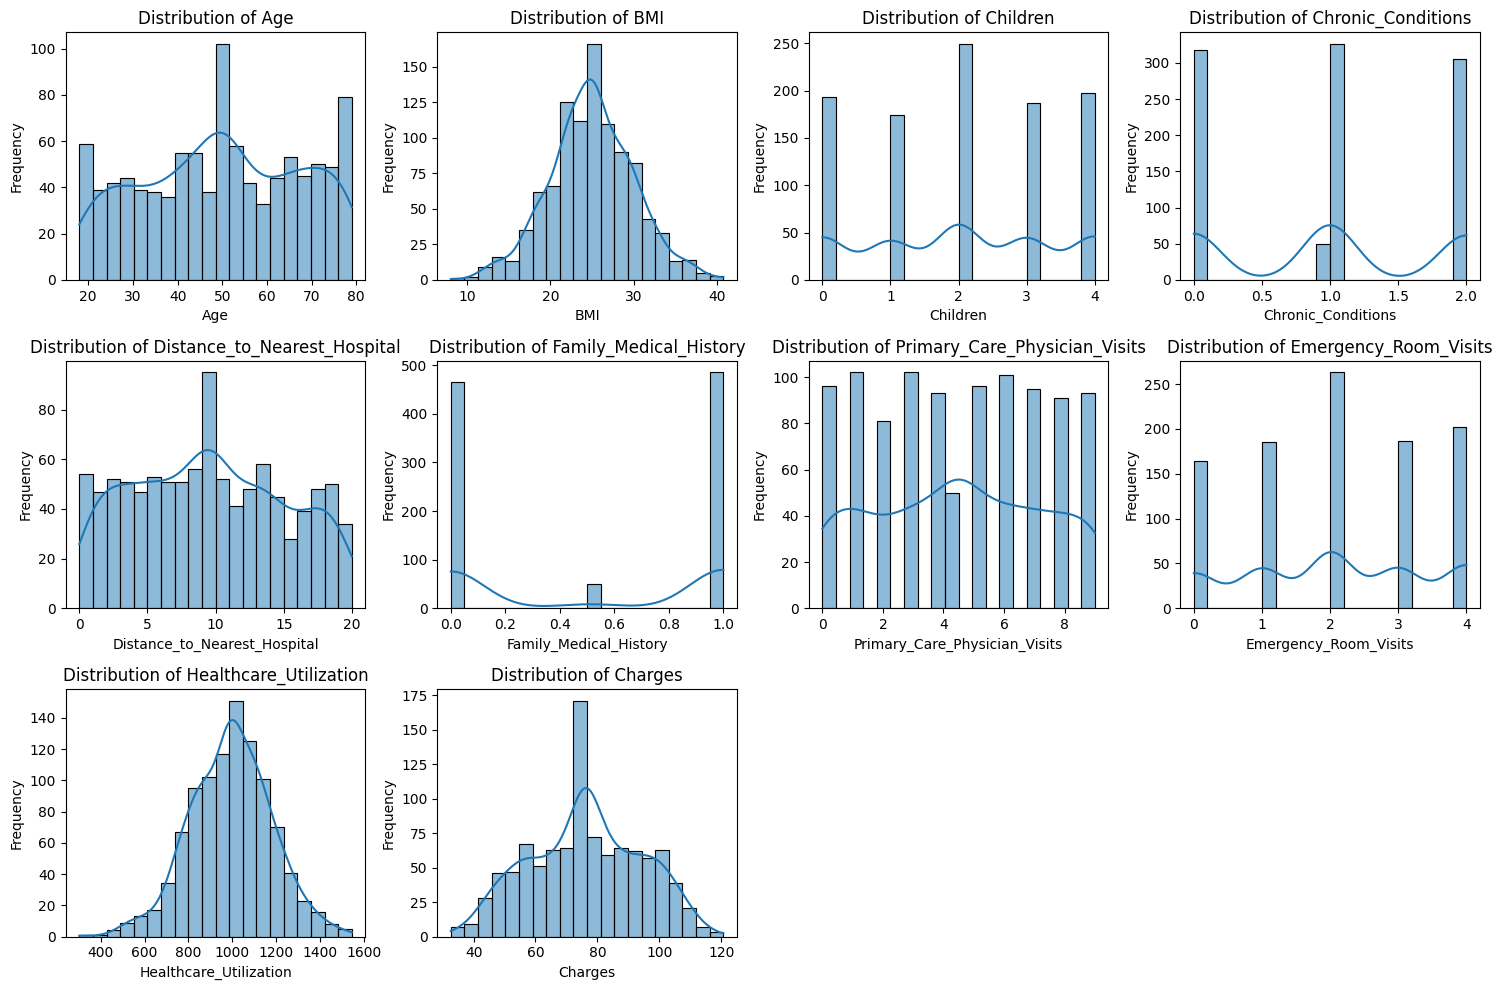

In [42]:
plt.figure(figsize=(15, 10))
for i, column_name in enumerate(Num_Val_Col, 1):
    plt.subplot(3, 4, i)  # Adjusted the subplot layout to accommodate all columns
    sns.histplot(data=df, x=column_name, kde=True, bins=20)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Treating the Null Values
SimpleImputer class from the sklearn.impute module. This class is used to impute (fill in) missing values in datasets.It
is initialized with a strategy for imputing missing values. In this case, the strategy chosen is 'mean', which means missing values will be replaced with the mean of the non-missing values in each column.

In [9]:
from sklearn.impute import SimpleImputer # Importing the Sklearn library

Num_Val_Col = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
                    'Distance_to_Nearest_Hospital', 'Family_Medical_History',   # Numerical Values column
                    'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
                    'Healthcare_Utilization', 'Charges']

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median', 'most_frequent', etc.

# Fit and transform the specified columns
df[Num_Val_Col] = imputer.fit_transform(df[Num_Val_Col])

missing_values_after_imputation = df[Num_Val_Col].isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64


#### Checking the Null Values in Numerical columns

In [31]:
df[Num_Val_Col].isnull().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64

### Pie Chart Visualization Of Region

In [43]:
region_count=df["Region"].value_counts()
region_count

Region
East     248
West     247
South    234
North    223
Name: count, dtype: int64

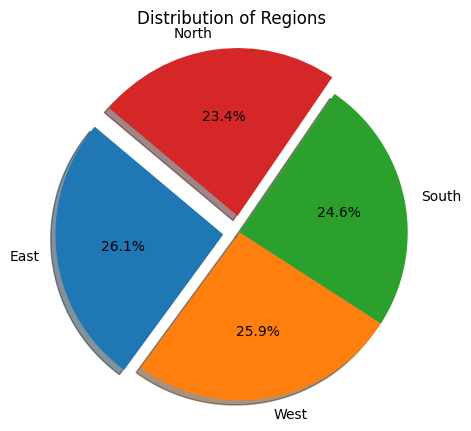

In [44]:
plt.figure(figsize=(5, 5))
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=140,shadow=True,explode=(0.1,0,0,0.1))
plt.title('Distribution of Regions')
plt.axis('equal') 
plt.show()


### Exploring Outliers in the Dataset

##### Outliers are data points that significantly differ from the rest of the observations in a dataset. Identifying and understanding outliers is crucial in data analysis as they can skew statistical measures and lead to inaccurate interpretations of the data. In this analysis, we will explore the presence of outliers in our dataset and their potential impact on our results.

##### Outliers can be identified using various statistical methods such as z-scores, interquartile range (IQR), or visual inspection through box plots or scatter plots.

##### Depending on the nature of the analysis, outliers can be handled by either removing them, transforming them, or keeping them intact but analyzing them separately

### Box Plot Visualization Of Outliers

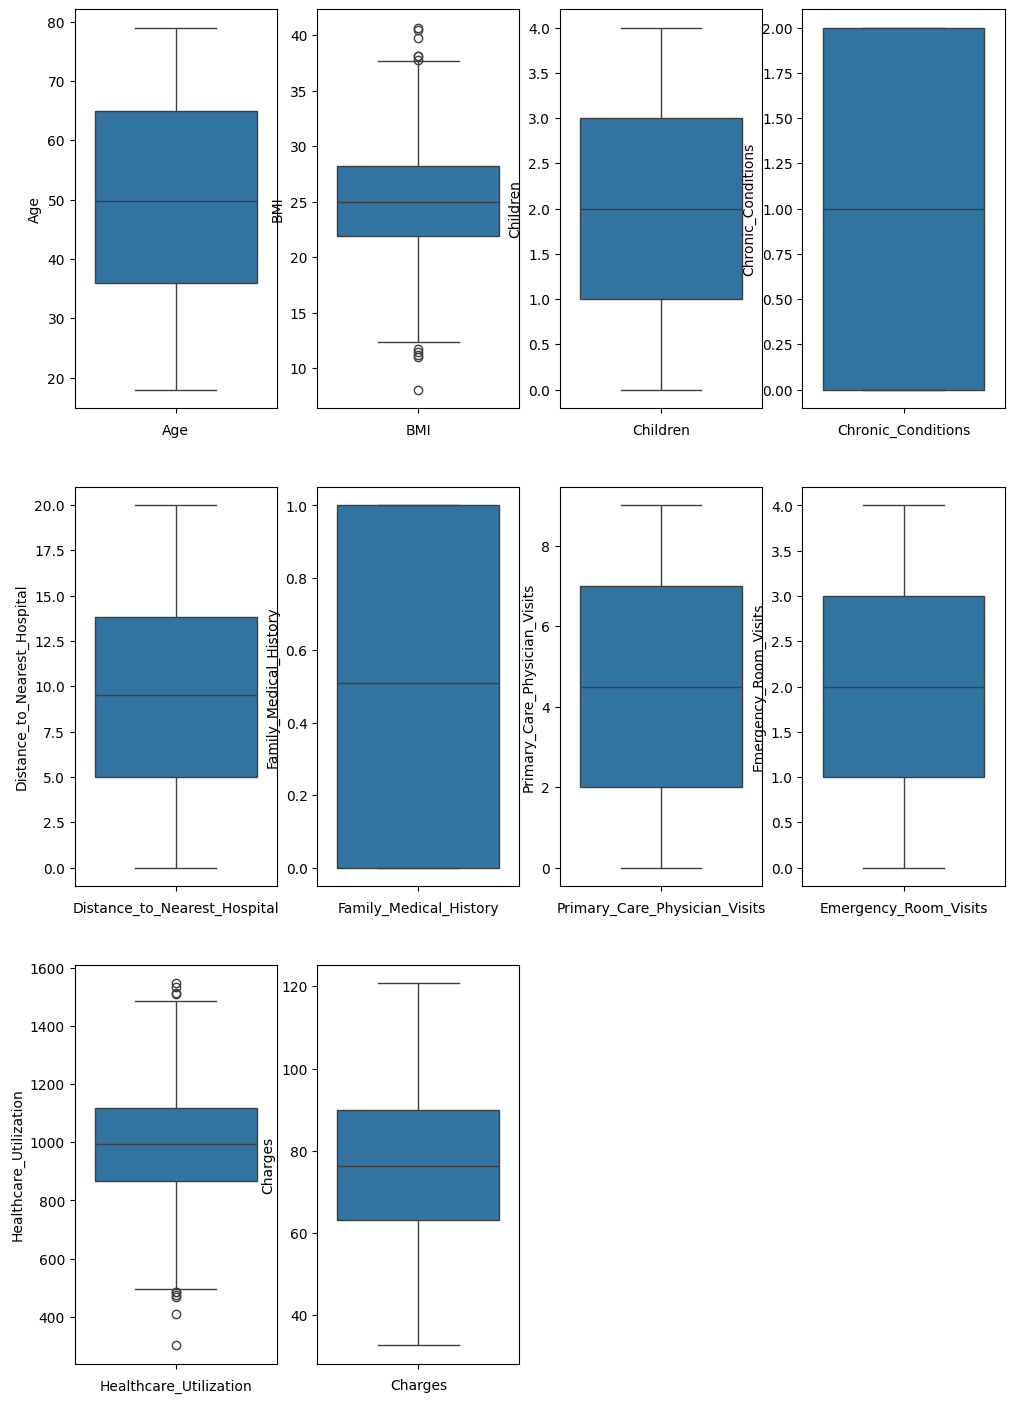

In [45]:
fig = plt.figure(figsize=(12,30))
counter = 0

for col in Num_Val_Col:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

#### As we have seen in the description data, the charge have a sign that this variable contains outliers, 
#### we can see the above figure that proves what we just said: the Charges more than approximately 17500 can be considered as outliers.
#### But based on the medical insurance industry, it can still be normal. Plus we only have 1000 data in the dataset, 
#### it is not a good idea to drop all the outliers data.

#### Treating Outliers with IQR method

In [33]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [34]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

### Box Plot Visualization Of after Outliers treatment

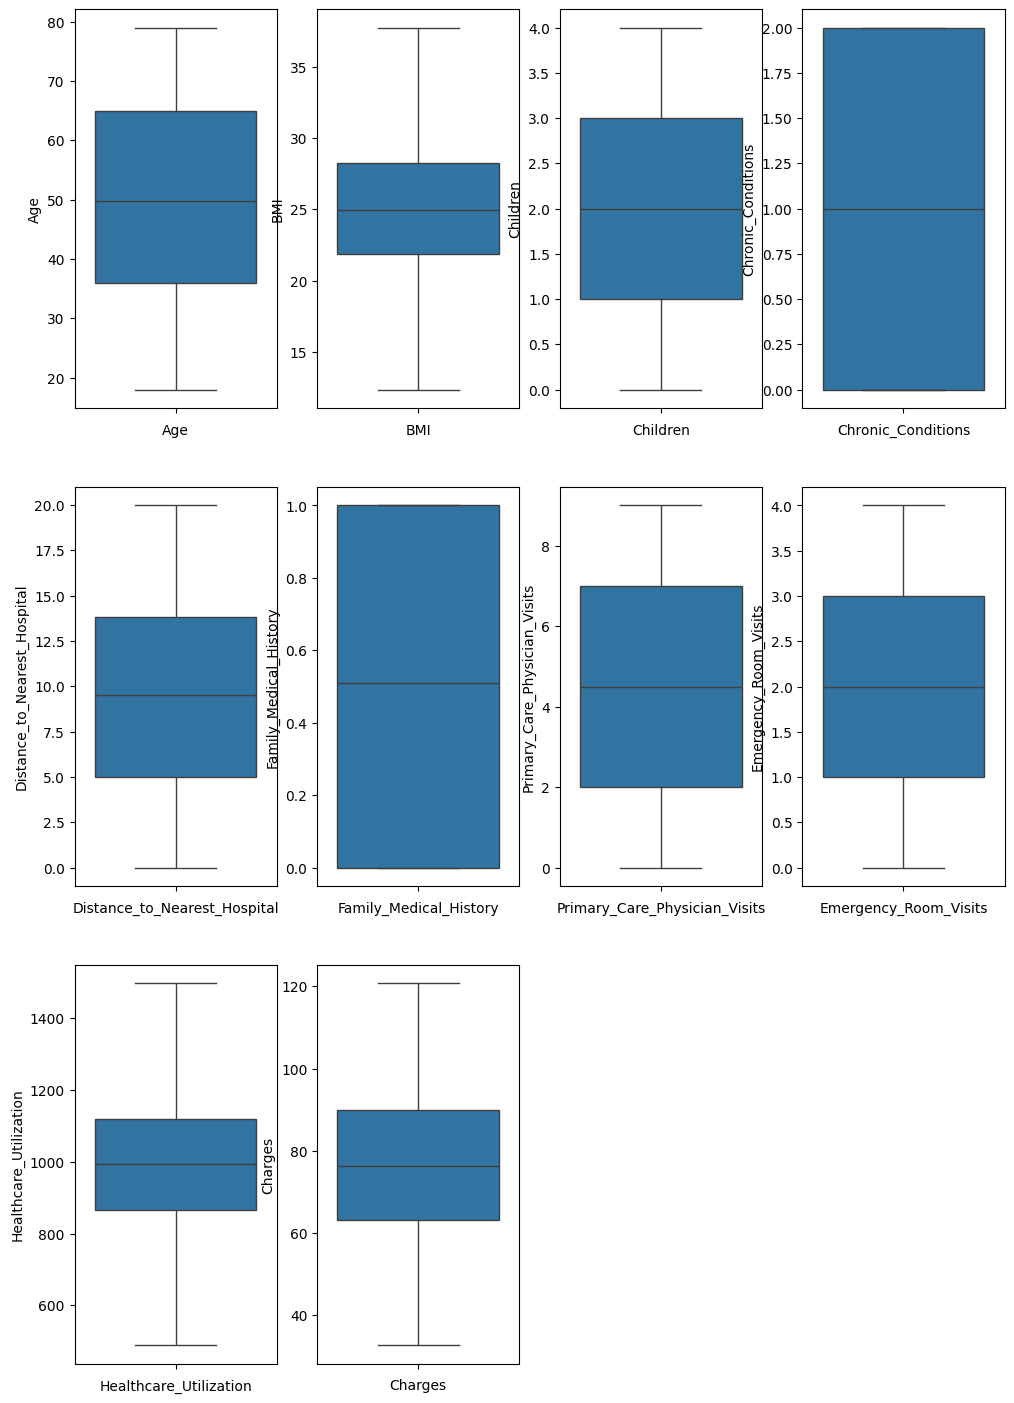

In [35]:
fig = plt.figure(figsize=(12,30))
counter = 0

for col in Num_Val_Col:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

#### Scatterplot Visualization Of Numerical columns

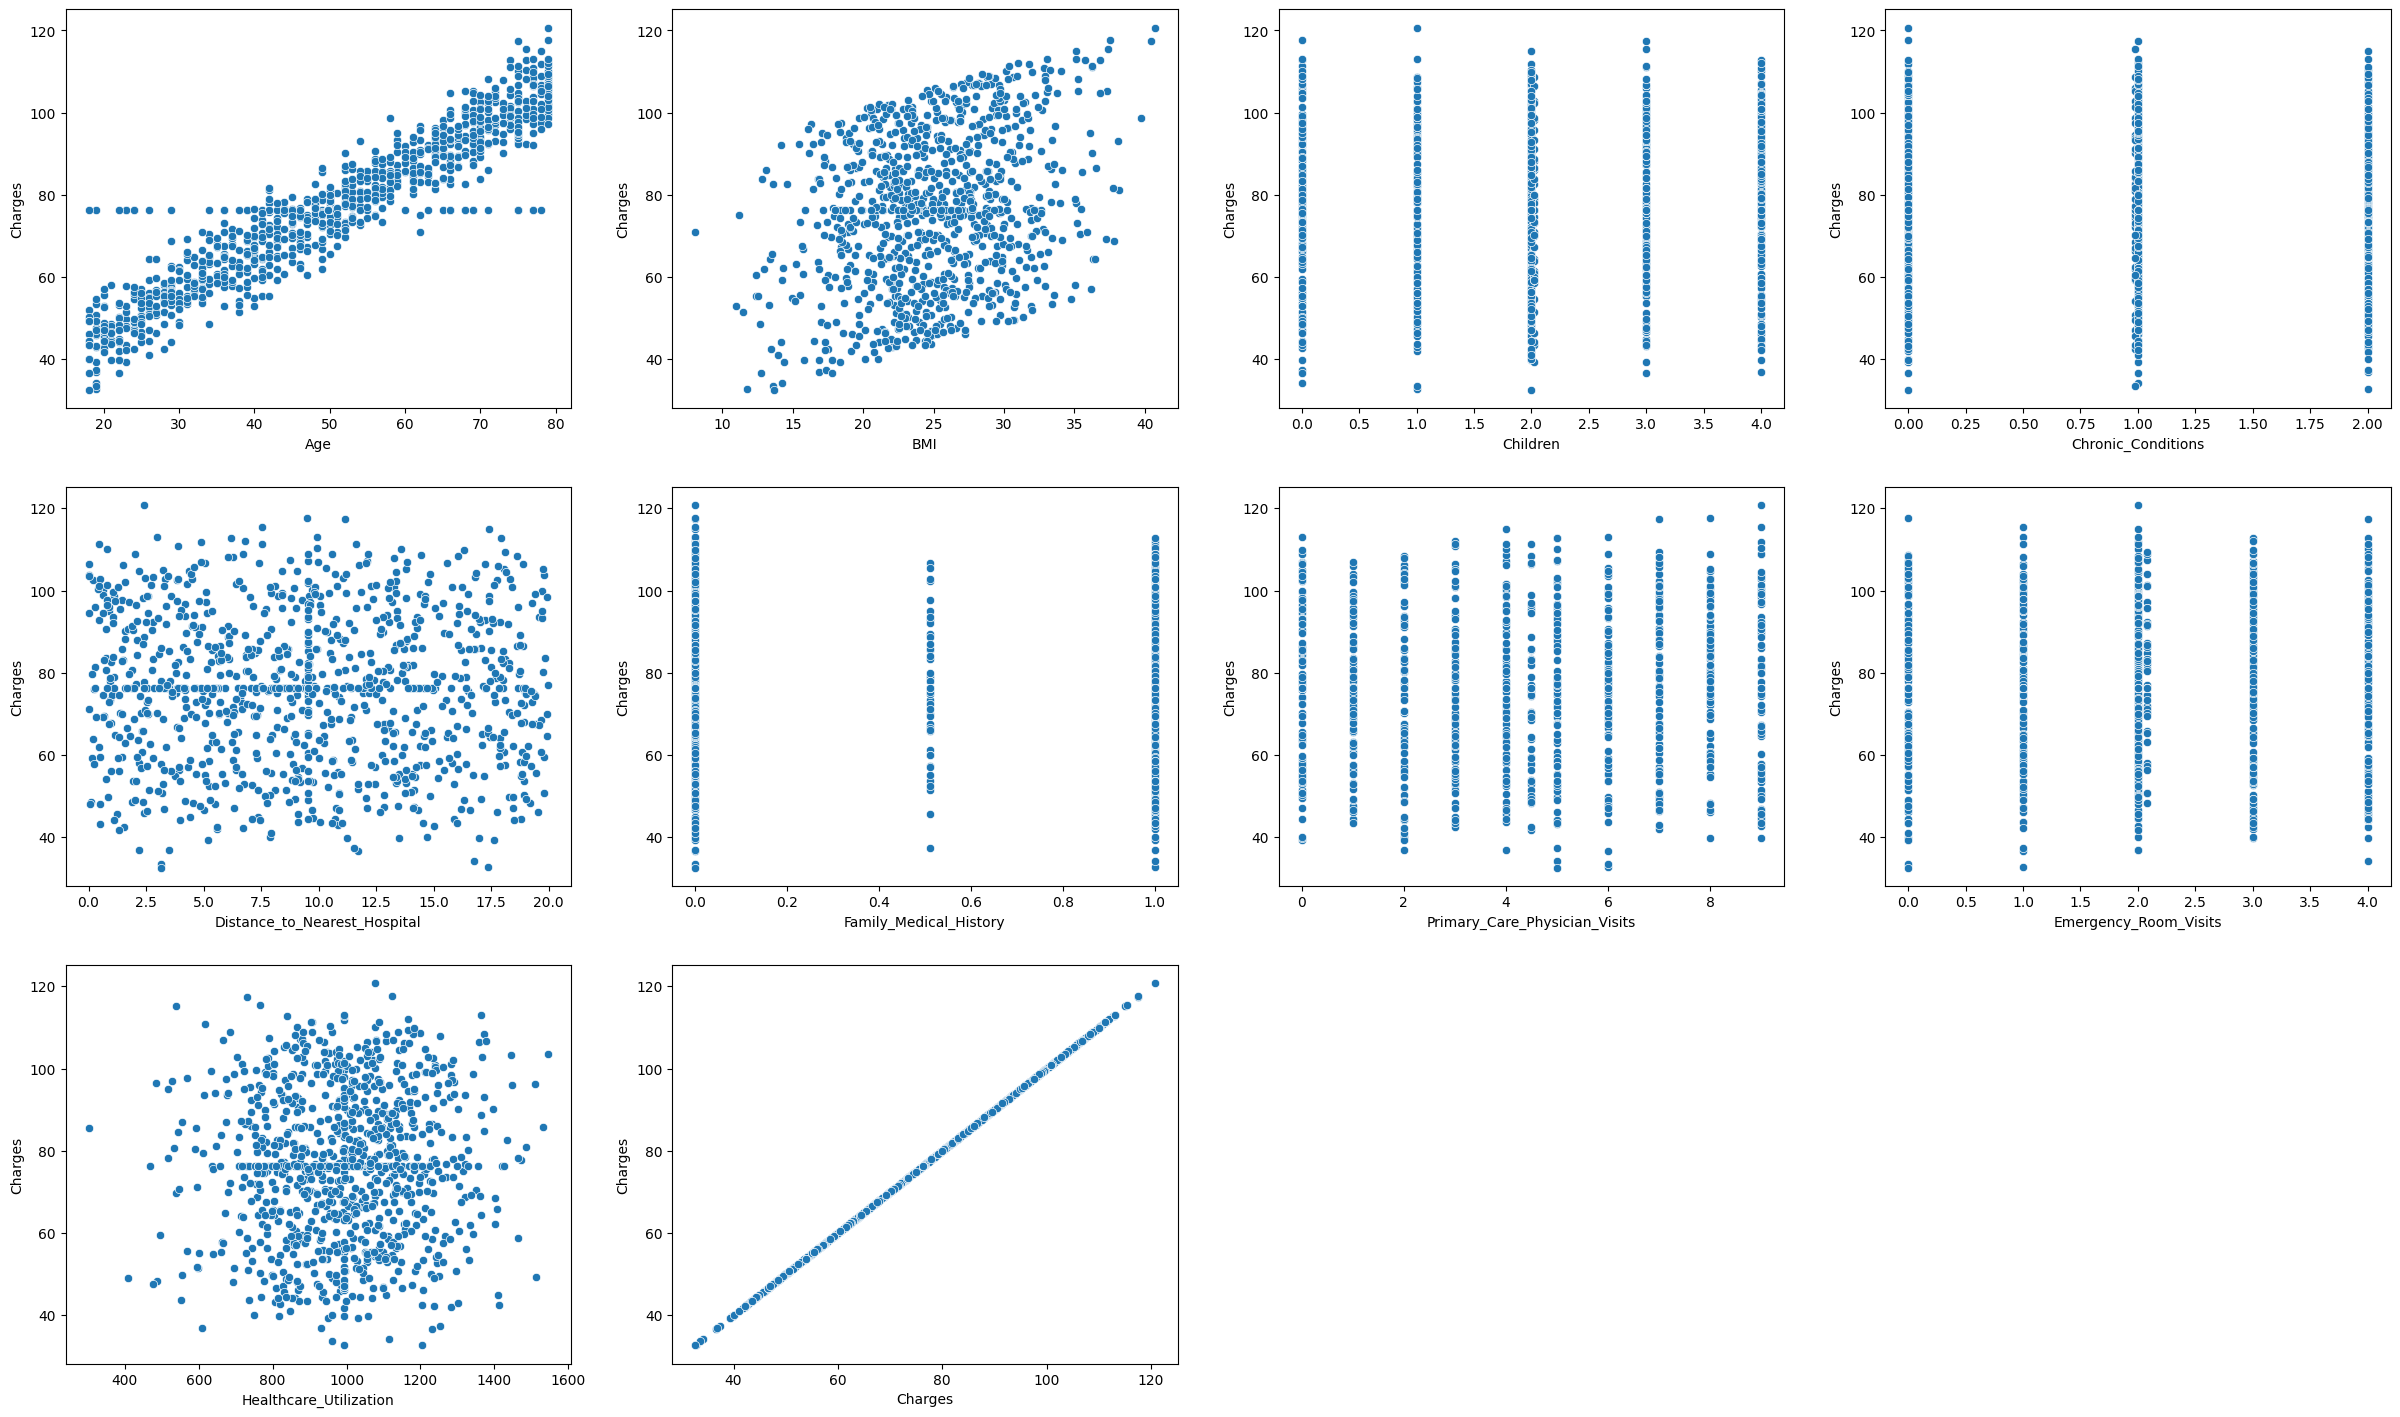

In [47]:

fig = plt.figure(figsize=(30,30))
counter = 0

for col in Num_Val_Col:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=col,y='Charges')
    plt.xlabel(col)
    counter = counter + 1

### Displaying the Sex Count

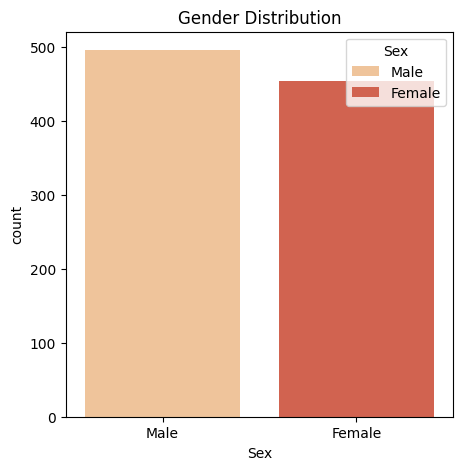

In [48]:
plt.figure(figsize=(5,5))

sns.countplot(x='Sex', data=df, hue='Sex', palette='OrRd')
plt.title('Gender Distribution')
plt.show()

### Barplot Of Age Vs Charges

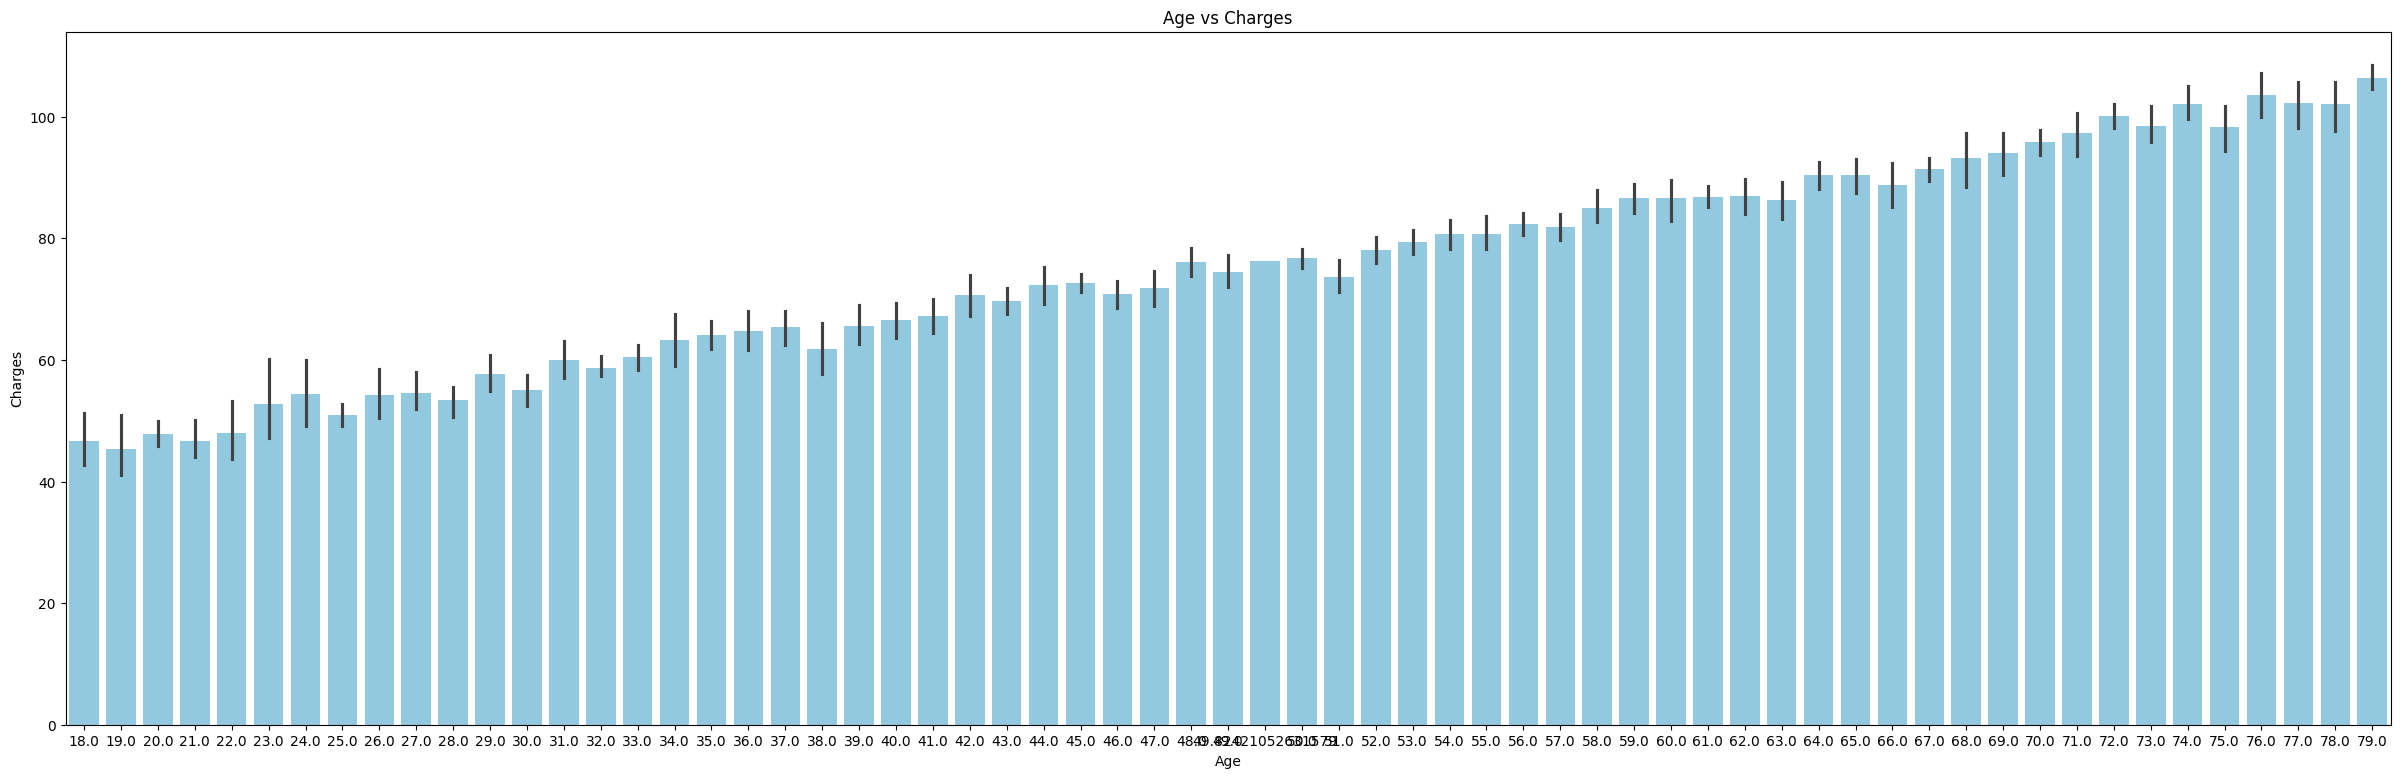

In [52]:
plt.figure(figsize=(30,9))
plt.title('Age vs Charges')

sns.barplot(x='Age',y='Charges',data=df, color='skyblue')
plt.show()

#### Distribution Of Age

<Figure size 1200x500 with 0 Axes>

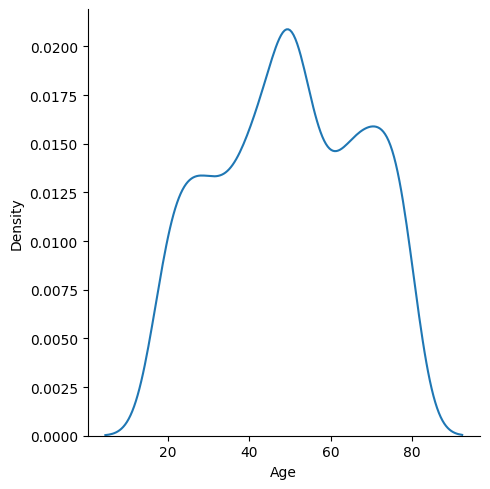

In [53]:
plt.figure(figsize=(12,5))
sns.displot(df['Age'], kind='kde')
plt.show()

#### Region Vs Charge

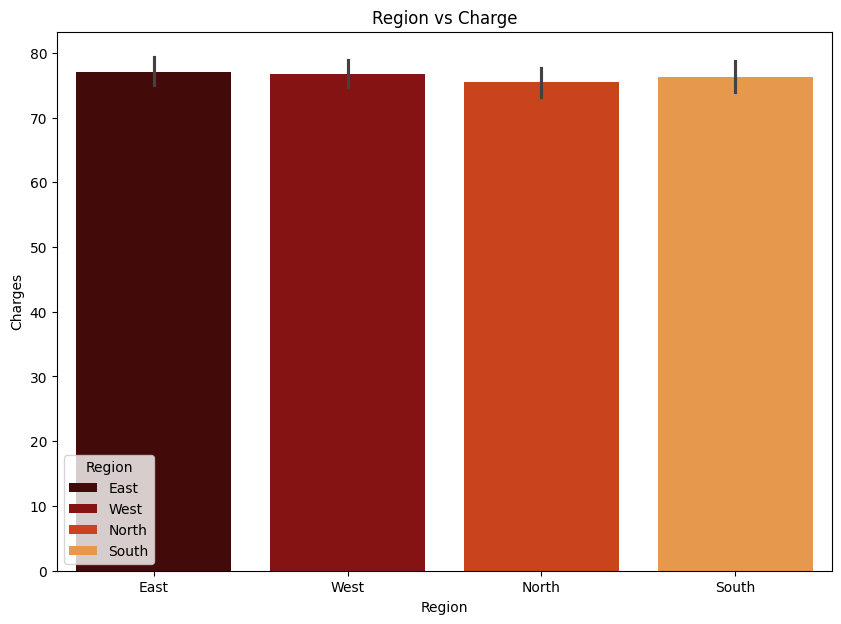

In [54]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='Region',y='Charges',hue='Region',palette='gist_heat',data=df)
plt.show()

#### They look very similar to each other, the south tends to have a little more medical bills than the other, let's see if we can discover more.

### Age Vs Charge

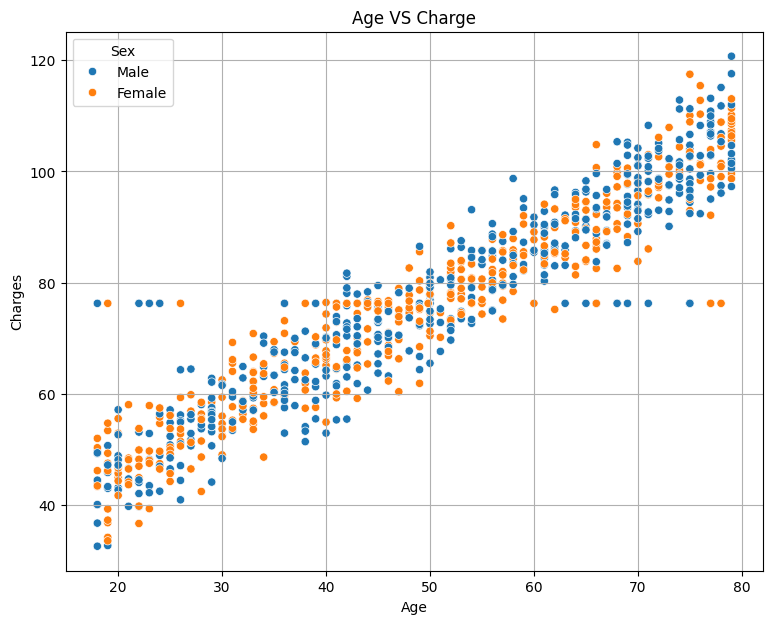

In [55]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Age',y='Charges',hue='Sex',data=df,color='blue', alpha=1)
plt.title('Age VS Charge')
plt.grid(True)
plt.show()

### Age Vs BMI

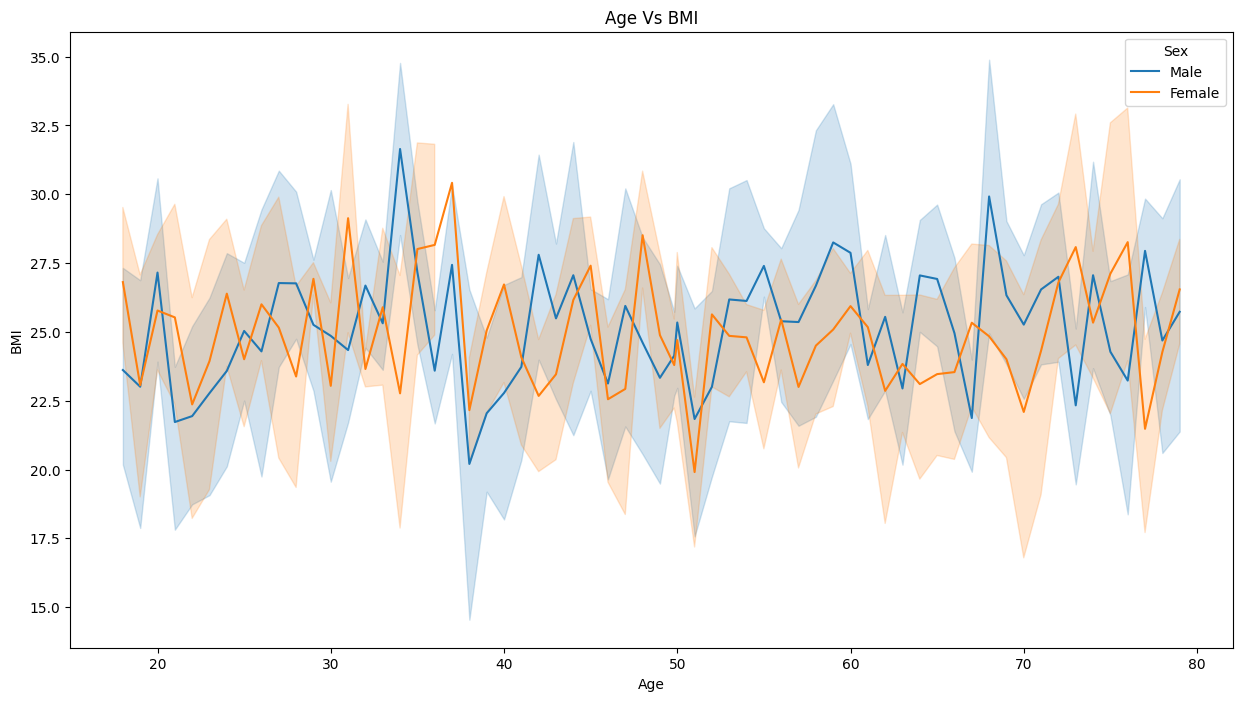

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age', y='BMI',hue='Sex', data=df)
plt.title('Age Vs BMI')
plt.show()

#### Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.
##### 
The BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more). When used to predict an individual's health, rather than as a statistical measurement for groups, the BMI has limitations that can make it less useful than some of the alternatives, especially when applied to individuals with abdominal obesity, short stature, or unusually high muscle mass.


### BMI Vs Charge

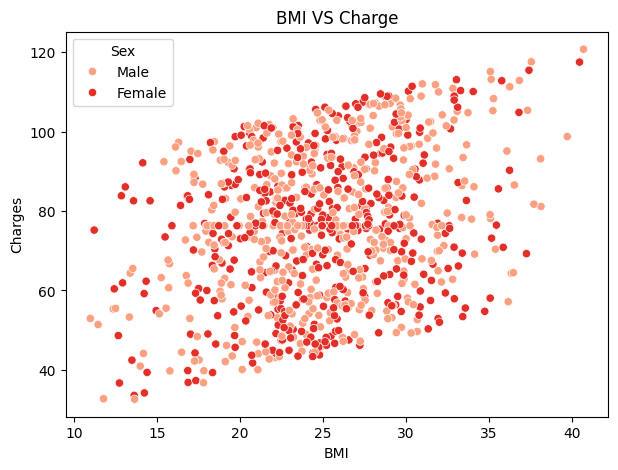

In [57]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='BMI',y='Charges',hue='Sex',data=df,palette='Reds')
plt.title('BMI VS Charge')
plt.show()

### Age Vs Insurance Plan

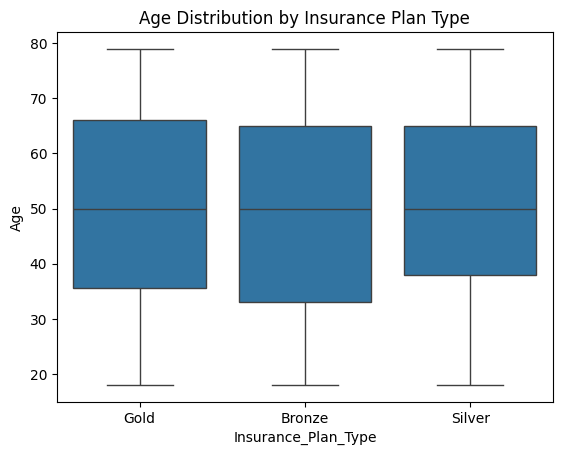

In [58]:
sns.boxplot(x='Insurance_Plan_Type', y='Age', data=df)
plt.title('Age Distribution by Insurance Plan Type')
plt.show()

#### Smoking can cause many diseases and health conditions, including:
##### Lung disease
Smoking can damage the airways and alveoli in the lungs, causing lung diseases such as COPD, emphysema, and chronic bronchitis. Smoking is also the cause of most lung cancers.
#### Cancer
Cigarette smoke contains over 5,000 chemicals, at least 70 of which can cause cancer. When smoking, these chemicals damage DNA, including parts that protect against cancer. Smoking can cause cancer in the mouth, throat, esophagus, stomach, colon, rectum, liver, pancreas, voicebox, lung, trachea, bronchus, kidney, urinary bladder, and cervix.

#### Other diseases
Smoking can cause heart disease, stroke, diabetes, tuberculosis, certain eye diseases, and problems with the immune system, including rheumatoid arthritis

### Smoker Count Based On Gender

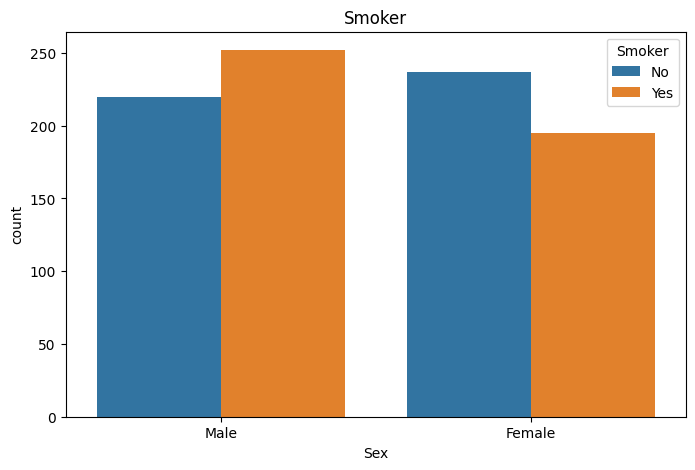

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df,hue='Smoker')
plt.title('Smoker')
plt.show()

### Count Of People Smoke

In [60]:
gender_smoker_count = df.groupby(['Sex', 'Smoker']).size().reset_index(name='Count')
gender_smoker_count

Sex Smoker  Count
0  Female     No    237
1  Female    Yes    195
2    Male     No    220
3    Male    Yes    252

### Gender Based Total Count of Smoking Habit

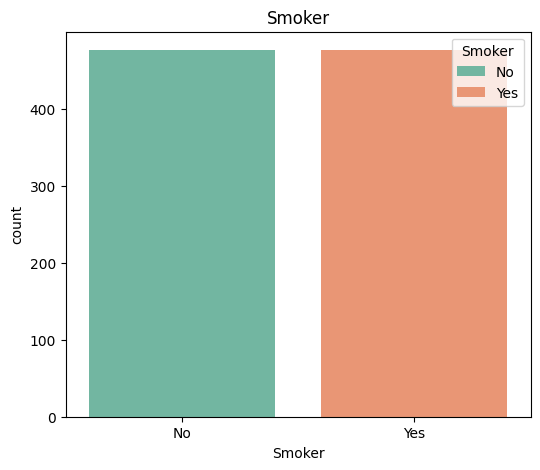

In [61]:
plt.figure(figsize=(6,5))
sns.countplot(x='Smoker', data=df,hue='Smoker',palette="Set2")
plt.title('Smoker')
plt.show()

### Description

The bar plot above illustrates the count of smokers and non-smokers categorized by gender. Each bar represents the total count of individuals belonging to a particular gender, with separate segments for smokers and non-smokers.

 
#### From the Analysis we can find that Female having the highest count of smoking habit 
#### 
According to the National Library of Medicine, smokers pay 30–40% more for health insurance than non-smokers. However, some say that smokers can pay almost double the premium of non-smokers. 
#### 
Insurance companies can charge smokers up to 50% more than non-smokers through a tobacco surcharge, which is called tobacco rating. The difference in premium depends on the frequency of smoking, with higher premiums for those who smoke more. Compulsive smokers may be rejected for health insurance applications


#### Treating with Categorical Columns

In [10]:
cat = df.select_dtypes(include=['object']).columns

print("Categorical columns:", cat)

Categorical columns: Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')


In [12]:
missing_values = df[cat].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Sex                               50
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Insurance_Plan_Type               49
Marital_Status                    47
Income_Level                      50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
Environmental_Factors             49
Genetic_Predisposition            47
Health_Literacy_Level             50
Comorbidities                     48
Access_to_Telemedicine            50
dtype: int64


In [13]:
cat=df[cat]

In [14]:
cat.replace('nan', pd.NA, inplace=True)

# Replace NaN values with the mode of each column
for column in cat.columns:
    mode_value = cat[column].mode()[0]  # Calculate the mode of the column
    cat[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode


C:\Users\DELL\AppData\Local\Temp\ipykernel_4872\3443295979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat.replace('nan', pd.NA, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4872\3443295979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode


In [15]:
cat.isnull().sum()

Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predisposition           0
Health_Literacy_Level            0
Comorbidities                    0
Access_to_Telemedicine           0
dtype: int64

### Smoking Habit based on Occupation

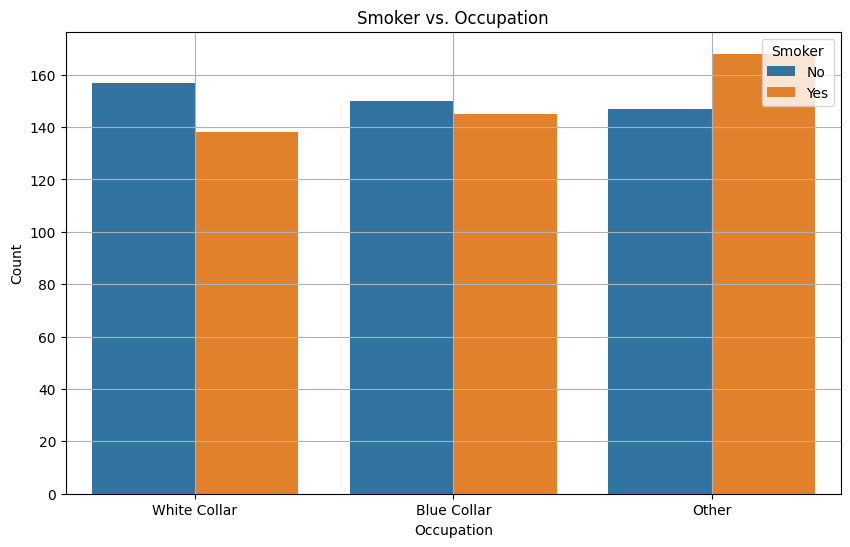

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Smoker', data=df)
plt.title('Smoker vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(True)
plt.show()

##### Based on the dataset and visualization, it appears that there is a notable correlation between occupation and smoking habits, particularly with blue-collar jobs exhibiting a higher rate of smokers. 
#####  Blue-collar jobs typically involve manual labor and are often associated with industries such as manufacturing, construction, transportation, and maintenance. These occupations often require physical exertion and may involve working in environments where smoking is more prevalent, such as outdoor work sites or manufacturing facilities.
##### Higher Stress Levels: Many blue-collar jobs involve physically demanding tasks and may be accompanied by high-stress levels. Smoking is sometimes used as a coping mechanism for stress, and individuals in high-stress occupations may be more likely to smoke as a way to alleviate tension or relax during breaks.
##### Based on the dataset, i observed a trend where students have a higher smoking rate compared to individuals in other occupations.
##### Academic pressure and social dynamics in educational institutions could also be factors contributing to increased smoking habits among students.For some students, smoking might be perceived as a form of experimentation or a way to rebel against societal norms.
##### Understanding the underlying reasons behind high smoking rates among students can help in designing effective intervention strategies aimed at reducing smoking prevalence in this demographic group.

##### Highlighting the lower smoking rates among individuals in other occupations can serve as a positive example and encourage students to adopt healthier behaviors as they transition into the workforce.

### Smoker Vs Insurance Charges

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='Smoker', ylabel='Charges'>

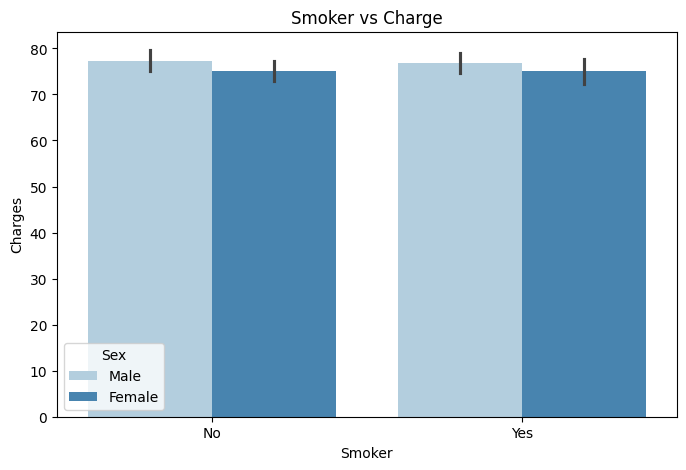

In [64]:
plt.figure(figsize=(8,5))
plt.title('Smoker vs Charge')
sns.barplot(x='Smoker',y='Charges',data=df,palette='Blues',hue='Sex')

#### This box plot gives us a very clear trend that the smokers are likely to pay more than the non-smokers. But let's discover even more. 

### Charges Vs BMI

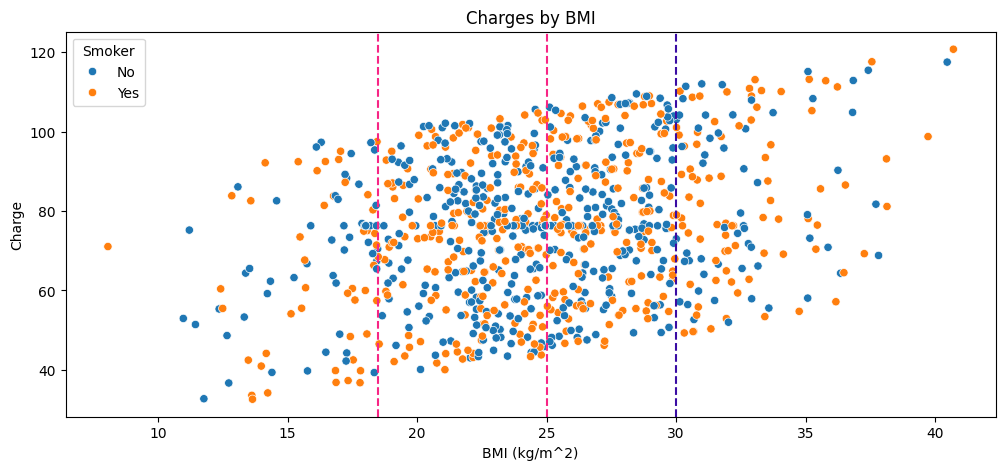

In [67]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='BMI', y='Charges', hue='Smoker')
plt.axvline(x=18.5, color='#F72585', linestyle = '--')  # under 18.5 - underweight, between 18.5~24.9 - Normal
plt.axvline(x=25, color = '#F72585', linestyle = '--')  # between 25~29.9 - Overweight
plt.axvline(x=30, color = '#3A0CA3', linestyle = '--')     # Over 30 - Obese
plt.title("Charges by BMI")
plt.xlabel("BMI (kg/m^2)")
plt.ylabel("Charge")
plt.show()

## Alcohol Consumption
##### Alcohol consumption influences health insurance rates by increasing the likelihood of health issues, leading insurers to perceive consumers as higher risks.If your insurance provider learns you regularly consume alcohol, the insurer might deny or reject your claim. This is because greater alcohol use may result in health risks that your insurer may not be willing to pay
##### The Centre for Disease Control and Prevention (CDC) has established a specific threshold for alcohol consumption, defining any amount exceeding it as excessive drinking. In India, the prescribed permissible blood alcohol content is set at 0.03% per 100 ml of blood, equivalent to 30mg of alcohol per 100 ml of blood.

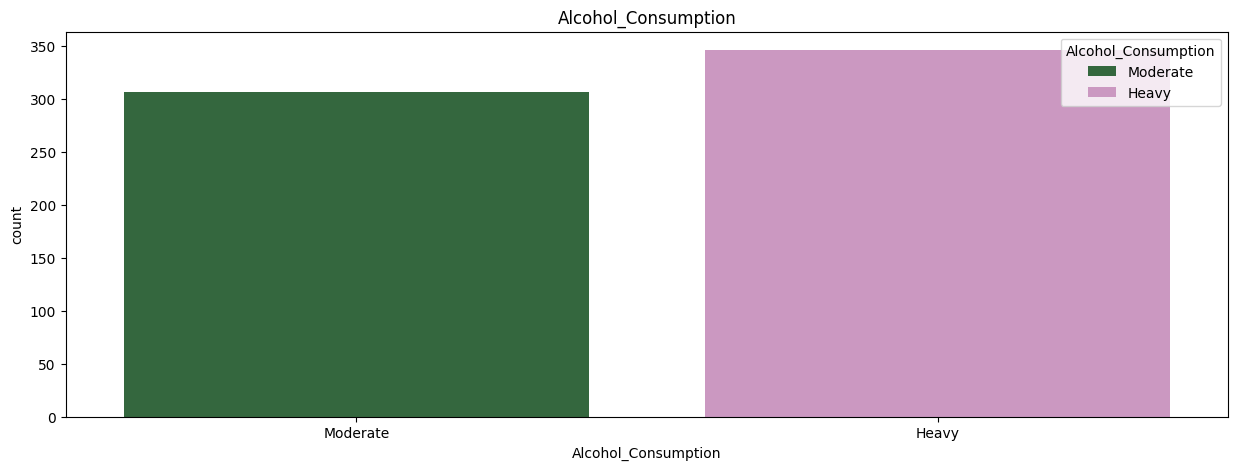

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x='Alcohol_Consumption',hue='Alcohol_Consumption', data=df,palette='cubehelix')
plt.title('Alcohol_Consumption')
plt.show()

#### Count of Alcohol Consumption

In [69]:
value_counts = df['Alcohol_Consumption'].value_counts()
value_counts

Alcohol_Consumption
Heavy       346
Moderate    306
Name: count, dtype: int64

#### The dataset contains counts of individuals based on their alcohol consumption habits. 
There are three categories: Never, Regularly, and Occasionally. 
The distribution shows that the majority of individuals either never consume alcohol or consume it occasionally. 
However, there is a sizable portion that consumes alcohol regularly. 
This information could be valuable for public health initiatives, targeting interventions towards different consumption groups.
 
#### Never:

This group comprises the largest number of individuals, indicating that a significant portion of the sample population abstains from alcohol consumption altogether.

#### Regularly:

While slightly fewer in number compared to the "Never" category, this group still constitutes a substantial portion of the sample and indicates a consistent alcohol consumption pattern.

#### Occasionally:

This group has the fewest individuals among the three categories but still represents a significant portion of the sample. They consume alcohol infrequently compared to the other two groups.s
The high number of individuals who never consume alcohol suggests a notable portion of the population either abstains due to personal, religious, or health-related reasons, or simply chooses not to drink.
The relatively large number of individuals who consume alcohol regularly indicates that a significant portion of the population has incorporated alcohol into their routine lifestyle.
The presence of individuals who consume alcohol occasionally suggests a diversity in drinking habits within the sample population, with some choosing to indulge occasionally rather than regularly..)

## Mental Health Status

####  Mental Health Status :
column in your dataset likely contains information regarding the mental well-being or psychological state of individuals. This column can provide insights into various aspects of mental health, including but not limited to

#### Good:
Individuals categorized under "good" mental health status typically exhibit positive psychological well-being and coping mechanisms. They often experience a sense of balance, resilience, and the ability to manage stressors effectively. They may display a positive outlook on life, feel satisfied with their relationships and work, and generally enjoy good emotional stability. They are likely to have healthy coping strategies, maintain social connections, and engage in activities that promote mental well-being.

#### Fair: 
Individuals categorized under "fair" mental health status may experience occasional challenges or fluctuations in their mental well-being. They may have periods of stress, mild anxiety, or low mood, but these feelings are generally manageable and do not significantly impair their daily functioning. They may seek support from friends, family, or mental health professionals during difficult times and may benefit from practicing self-care techniques to maintain balance and resilience.

#### Poor: 
Individuals categorized under "poor" mental health status may experience significant distress, dysfunction, or impairment in various areas of their lives due to mental health issues. They may struggle with persistent anxiety, depression, mood swings, or other mental health disorders that interfere with their ability to function optimally at work, school, or in relationships. They may have difficulty coping with stressors, maintaining social connections, or engaging in activities they once enjoyed. They may require professional intervention, such as therapy, medication, or other forms of support, to address their mental health challenges effectively.

#### Excellent: 
Individuals categorized under "excellent" mental health status demonstrate a high level of psychological well-being and resilience. They typically exhibit strong emotional stability, positive self-esteem, and adaptive coping strategies. They may experience occasional stressors or setbacks, but they are able to navigate these challenges effectively and maintain a sense of overall well-being. They may actively engage in practices that promote mental wellness, such as mindfulness, regular exercise, and healthy lifestyle choices. They often enjoy fulfilling relationships, a sense of purpose, and a positive outlook on life.

This description provides a nuanced understanding of the different levels of mental health status and can help in interpreting and analyzing the data effectively.



### Count Of Values in Mental_Health_Status

In [72]:
value_counts = df['Mental_Health_Status'].value_counts()
value_counts

Mental_Health_Status
Fair    332
Good    325
Poor    295
Name: count, dtype: int64

### Visualising the Mental Status on the basis Of Sex

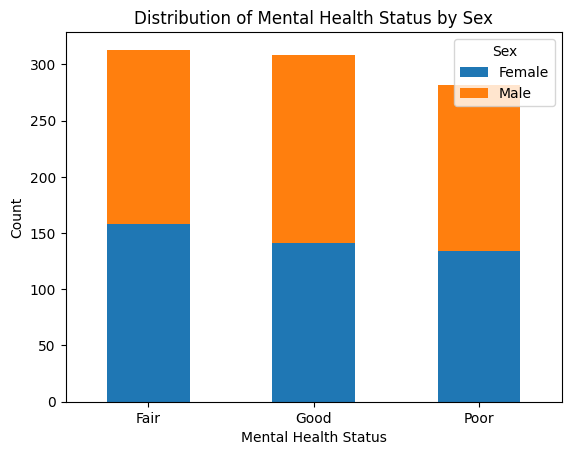

In [73]:
counts = df.groupby(['Mental_Health_Status', 'Sex']).size().unstack()

counts.plot(kind='bar', stacked=True)
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Status by Sex')
plt.xticks(rotation=0) 
plt.legend(title='Sex')
plt.show()

#### Excellent Mental Health Status:
The highest count is observed among females. This indicates that a significant proportion of females in your dataset report having excellent mental health.
Possible reasons for this could include various factors such as societal expectations, coping mechanisms, access to healthcare, and individual differences in how mental health is perceived and reported.
#### Fair Mental Health Status:
Females seem to have a higher count in the "fair" category. This suggests that a notable portion of females rate their mental health as fai.
Again, several factors could contribute to this, including societal pressures, biological differences, and personal experienc
#### # Good Mental Health Status:
The higher count in this category is observed among males. This implies that a larger proportion of males in your dataset report having good mental health compared to females.
Potential factors influencing this could include differences in stressors, coping mechanisms, societal expectations regarding mental health, and access to mental health resource

#### Poor Mental Health Status:
The higher count is seen among males. This indicates that a significant portion of males in your dataset report having poor mental health.
There could be various reasons for this, including stigma around mental health for males, reluctance to seek help, societal pressure to appear strong, and potentially fewer support networks compared to feles.s.




### Mental Health Vs Occupation

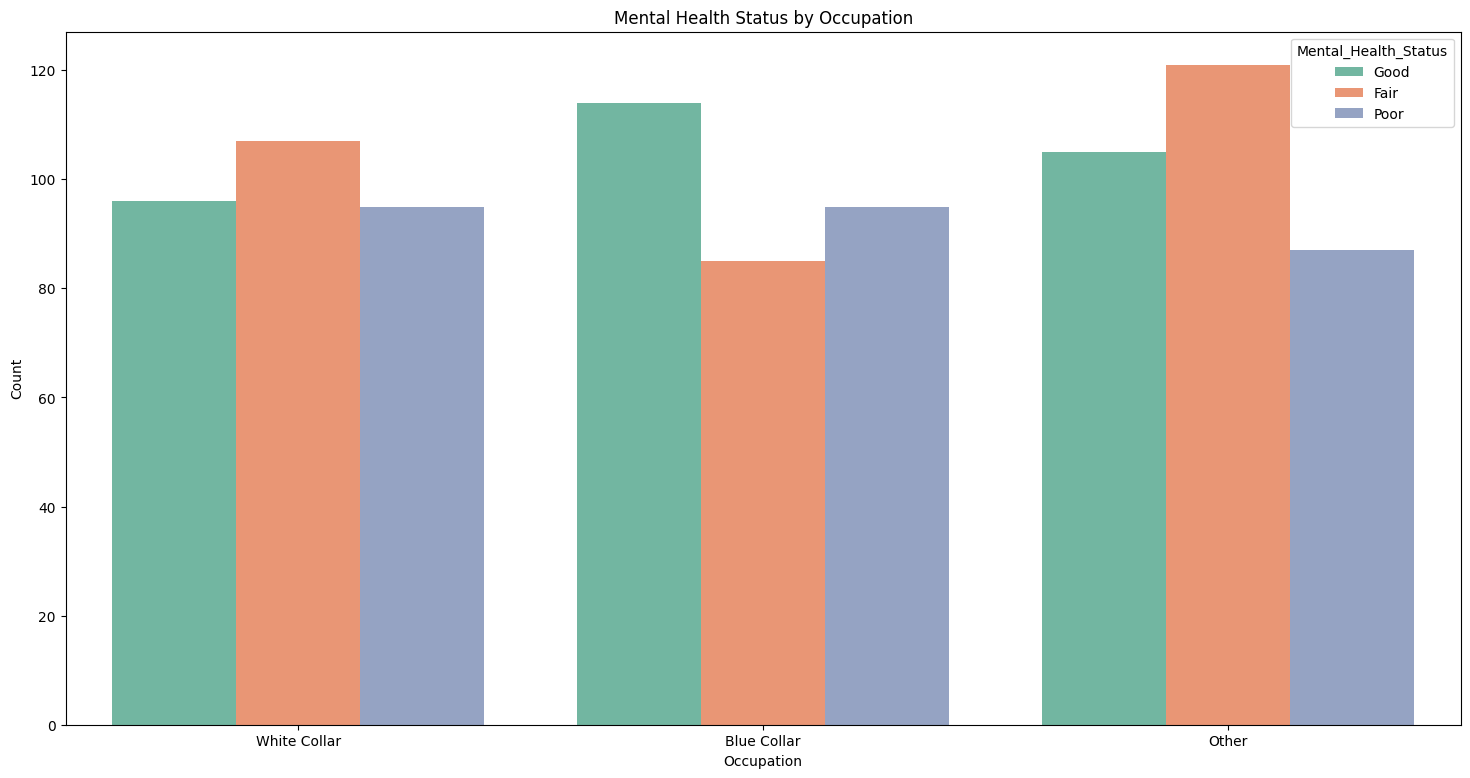

In [74]:
plt.figure(figsize=(18,9))
sns.countplot(x='Occupation', hue='Mental_Health_Status', palette = "Set2",data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Mental Health Status by Occupation')
plt.show()

### Exercise Frequency
The frequency of exercise can indeed impact medical insurance costs, although the specifics can vary depending on the insurance provider and the country's healthcare system. Here's how exercise frequency might influence insurance costs:
##### Healthier Lifestyle:
Regular exercise is associated with numerous health benefits, including reduced risk of chronic diseases like heart disease, diabetes, and certain cancers. Insurers may offer lower premiums or other incentives to individuals who engage in regular physical activity because they are generally at lower risk for costly health problems.
##### Risk Assessment: 
Insurance companies assess risk when determining premiums. Individuals who exercise regularly may be deemed lower risk because they are less likely to develop certain health conditions or require expensive medical interventions. This could result in lower premiums for those who exercise frequently.
##### Preventive Care:
Regular exercise is a form of preventive healthcare, which can reduce the likelihood of developing certain conditions that require medical treatment. Insurance companies may factor in the cost savings associated with preventive care when setting premiums for individuals who exercise regularly.
##### Claims History:
Individuals who exercise regularly may have a lower frequency of medical claims, leading to lower overall costs for the insurance company. As a result, insurers may offer lower premiums to encourage healthy behaviors like exercise.


#### Exercise Frequency Vs Gender

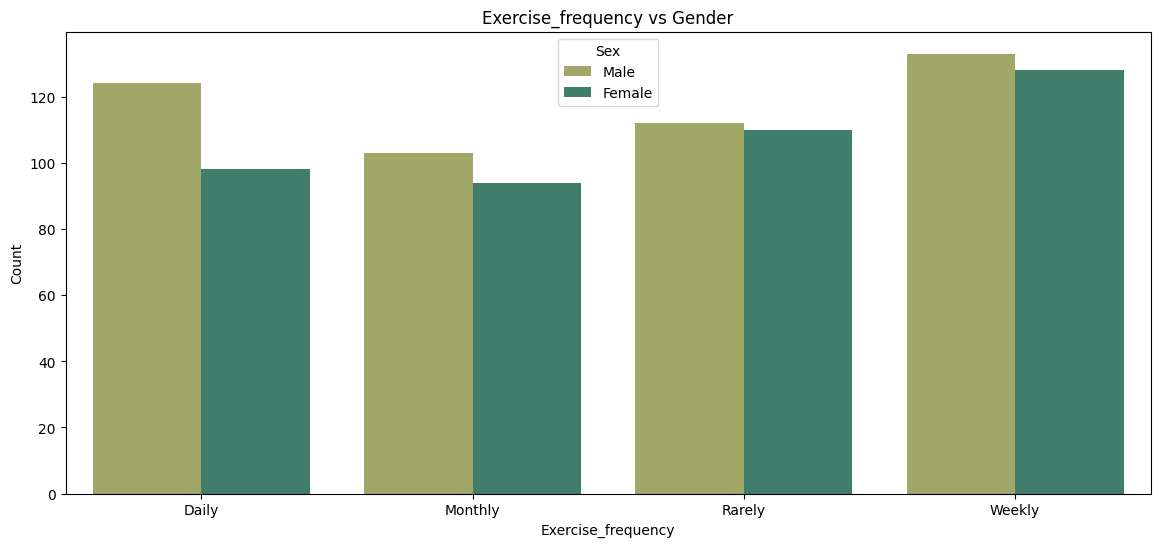

In [75]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Exercise_Frequency', hue='Sex',palette="gist_earth_r", data=df)
plt.title('Exercise_frequency vs Gender')
plt.xlabel('Exercise_frequency')
plt.ylabel('Count')
plt.show()

#### Based on the countplot depicting Exercise Frequency versus Gender, several notable patterns emerge.

##### Rare Exercise Frequency:
The data shows that females exhibit the highest count in the category of rare exercise frequency. This suggests that a significant portion of females in the dataset engages in exercise in frequently.
##### Twice a Week Exercise Frequency:
Interestingly, females again display a high count in this category, indicating a substantial proportion of females exercise twice a week.
##### Daily Exercise Frequency:
Females continue to dominate in the daily exercise category, suggesting that a considerable number of females exercise daily compared to males.
##### Three Times a Week Exercise Frequency:
Once more, females lead in this exercise frequency bracket, indicating that a significant portion of females in the dataset exercises three times a week.
##### Once a Week Exercise Frequency:
In contrast to the previous categories, males now exhibit the highest count, specifically in the once-a-week exercise frequency group. This implies that among those who exercise only once a week, males are more prevalent in the dataset compared to females.

Overall, the data suggests a notable gender disparity in exercise frequency. While females dominate in exercising rarely, twice a week, daily, and three times a week, males seem to be more prevalent among those who exercise only once a week.

#### Exercise And Sleep_Quality

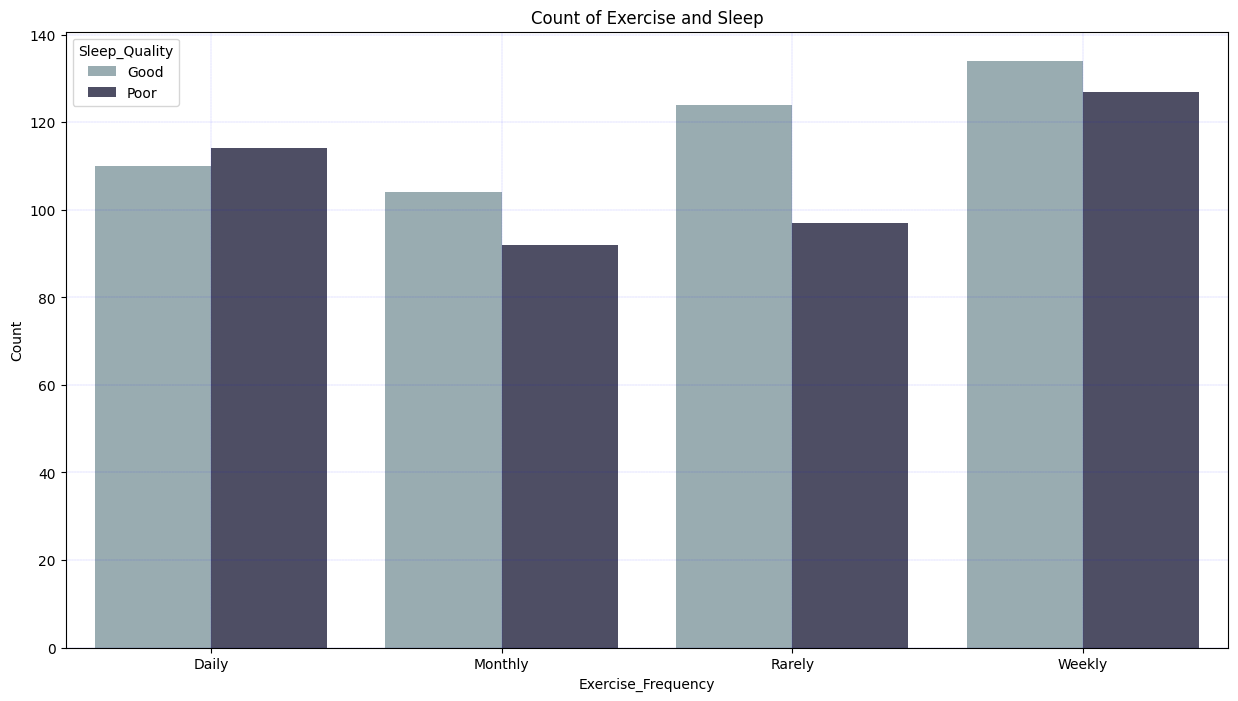

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Exercise_Frequency', hue='Sleep_Quality',palette="bone_r")
plt.title('Count of Exercise and Sleep')
plt.xlabel('Exercise_Frequency')
plt.ylabel('Count')
plt.grid(linestyle='--', linewidth='0.1', color='blue')
plt.legend(title='Sleep_Quality')

It appears that there is a relationship between exercise frequency and sleep quality.

Those who exercise rarely tend to experience poor sleep quality the most, followed by fair quality, good quality, and excellent quality in decreasing order of frequency.

Conversely, individuals who exercise twice a week tend to have fair quality sleep as the most common outcome, followed by good quality, poor quality, and excellent quality.

For those who exercise daily, excellent sleep quality is the most prevalent, followed by good quality, fair quality, and poor quality.

Similarly, individuals who exercise three times a week are more likely to experience good quality sleep as the most common outcome, followed by excellent quality, poor quality, and fair quality.

Finally, those who exercise once a week tend to have good quality sleep as the most common outcome, followed by excellent quality, poor quality, and fair quality.

Overall, the plot suggests that there is a trend where more frequent exercise correlates with better sleep quality, with those who exercise more frequently generally experiencing higher quality sleep compared to those who exercise less frequently.

### Insurance Plan Types
A health insurance policy is a contract between the insurance company and an individual. The individual pays a premium to the insurer and the insurer offers financial protection against healthcare expenses to the individual in return.

Some health insurance features include coverage for hospitalisation expenses, pre-and post-hospitalisation expenses, and the cost of treatments and surgeries. Health insurance benefits also include cashless hospitalisation, daycare procedures, and coverage for pre-existing illnesses after a waiting period.

### Label Encoding And One-hot encoding

In [16]:
columns_to_label_encode = ['Exercise_Frequency', 'Income_Level', 'Education_Level']
columns_to_one_hot_encode = ['Sex', 'Smoker', 'Region', 'Occupation', 'Insurance_Plan_Type',
                             'Marital_Status', 'Mental_Health_Status', 'Prescription_Medication_Usage',
                             'Employment_Status', 'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
                             'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
                             'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
                             'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']

# Perform label encoding
cat[columns_to_label_encode] = cat[columns_to_label_encode].apply(lambda x: pd.factorize(x)[0])

# Perform one-hot encoding
cat_enco = pd.get_dummies(cat, columns=columns_to_one_hot_encode)

# Display the modified DataFrame
(cat_enco)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4872\3782228094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[columns_to_label_encode] = cat[columns_to_label_encode].apply(lambda x: pd.factorize(x)[0])


Exercise_Frequency  Income_Level  Education_Level  Sex_Female  Sex_Male  \
0                     0             0                0       False      True   
1                     1             1                0       False      True   
2                     2             0                1        True     False   
3                     2             1                0       False      True   
4                     3             2                1       False      True   
..                  ...           ...              ...         ...       ...   
995                   1             1                0       False      True   
996                   1             2                0        True     False   
997                   1             0                0       False      True   
998                   2             2                0       False      True   
999                   2             1                2        True     False   

     Smoker_No  Smoker_Yes  Region_East  Region_North  Region_South  ...  \
0         True       False         True         False         False  ...   
1        False        True        False         False         False  ...   
2        False        True         True         False         False  ...   
3         True       False        False          True         False  ...   
4         True       False         True         False         False  ...   
..         ...         ...          ...           ...           ...  ...   
995      False        True        False         False         False  ...   
996      False        True         True         False         False  ...   
997       True       False        False         False          True  ...   
998       True       False        False         False         False  ...   
999       True       False        False         False          True  ...   

     Environmental_Factors_Good  Environmental_Factors_Poor  \
0                          True                       False   
1                          True                       False   
2                          True                       False   
3                          True                       False   
4                         False                        True   
..                          ...                         ...   
995                        True                       False   
996                        True                       False   
997                       False                        True   
998                        True                       False   
999                        True                       False   

     Genetic_Predisposition_Absent  Genetic_Predisposition_Present  \
0                            False                            True   
1                             True                           False   
2                             True                           False   
3                            False                            True   
4                            False                            True   
..                             ...                             ...   
995                           True                           False   
996                           True                           False   
997                          False                            True   
998                          False                            True   
999                           True                           False   

     Health_Literacy_Level_High  Health_Literacy_Level_Low  Comorbidities_No  \
0                          True                      False             False   
1                          True                      False             False   
2                         False                       True              True   
3                         False                       True              True   
4                         False                       True             False   
..                          ...                      

In [17]:
df_cleaned = pd.concat([df[Num_Val_Col], cat_enco], axis=1)
df_cleaned

Age        BMI  Children  Chronic_Conditions  \
0    56.0  26.787630       0.0                 2.0   
1    69.0  22.063650       4.0                 2.0   
2    46.0  24.036100       2.0                 1.0   
3    32.0  24.229820       2.0                 2.0   
4    60.0  31.784280       0.0                 0.0   
..    ...        ...       ...                 ...   
995  18.0  17.794340       0.0                 1.0   
996  35.0  22.538240       1.0                 1.0   
997  49.0  18.285480       4.0                 2.0   
998  64.0  22.096110       2.0                 0.0   
999  66.0  24.951876       2.0                 1.0   

     Distance_to_Nearest_Hospital  Family_Medical_History  \
0                       12.233110                     0.0   
1                       11.314950                     0.0   
2                       14.294050                     1.0   
3                       18.754090                     0.0   
4                       18.245090                     1.0   
..                            ...                     ...   
995                      3.480209                     0.0   
996                     15.215190                     1.0   
997                      0.316761                     0.0   
998                     11.156200                     1.0   
999                      7.589228                     1.0   

     Primary_Care_Physician_Visits  Emergency_Room_Visits  \
0                         6.000000                    4.0   
1                         2.000000                    2.0   
2                         9.000000                    2.0   
3                         2.000000                    0.0   
4                         2.000000                    2.0   
..                             ...                    ...   
995                       2.000000                    2.0   
996                       2.000000                    4.0   
997                       3.000000                    1.0   
998                       8.000000                    0.0   
999                       4.482105                    2.0   

     Healthcare_Utilization    Charges  ...  Environmental_Factors_Good  \
0                  975.5380  84.787630  ...                        True   
1                 1047.9770  92.063650  ...                        True   
2                  836.3854  71.036100  ...                        True   
3                  927.0653  58.229820  ...                        True   
4                 1260.7970  91.784280  ...                       False   
..                      ...        ...  ...                         ...   
995                932.2167  36.794340  ...                        True   
996               1280.2350  58.538240  ...                        True   
997               1336.6650  69.285480  ...                       False   
998                779.2834  88.096110  ...                        True   
999                467.0529  76.292654  ...                        True   

     Environmental_Factors_Poor  Genetic_Predisposition_Absent  \
0                         False                          False   
1                         False                           True   
2                         False                           True   
3                         False                          False   
4                          True                          False   
..                          ...                            ...   
995                       False                           True   
996                       False                           True   
997                        True                          False   
998                       False                          False   
999                       False                           True   

     Genetic_Predisposition_Present  Health_Literacy_Level_High  \
0                              True                        True   
1                             False                        True

In [27]:
df_cleaned.isnull().sum()

Age                                   0
BMI                                   0
Children                              0
Chronic_Conditions                    0
Distance_to_Nearest_Hospital          0
                                     ..
Health_Literacy_Level_Low             0
Comorbidities_No                      0
Comorbidities_Yes                     0
Access_to_Telemedicine_Available      0
Access_to_Telemedicine_Unavailable    0
Length: 65, dtype: int64

### Correlation Matrix

In [18]:
df_cleaned.corr()

Age       BMI  Children  \
Age                                 1.000000  0.033585  0.026279   
BMI                                 0.033585  1.000000  0.007655   
Children                            0.026279  0.007655  1.000000   
Chronic_Conditions                 -0.051093  0.043192 -0.028874   
Distance_to_Nearest_Hospital       -0.025700 -0.015691  0.006191   
...                                      ...       ...       ...   
Health_Literacy_Level_Low           0.020989  0.014407  0.019221   
Comorbidities_No                    0.021240  0.010548  0.033759   
Comorbidities_Yes                  -0.021240 -0.010548 -0.033759   
Access_to_Telemedicine_Available    0.036018 -0.028288  0.018397   
Access_to_Telemedicine_Unavailable -0.036018  0.028288 -0.018397   

                                    Chronic_Conditions  \
Age                                          -0.051093   
BMI                                           0.043192   
Children                                     -0.028874   
Chronic_Conditions                            1.000000   
Distance_to_Nearest_Hospital                  0.011305   
...                                                ...   
Health_Literacy_Level_Low                    -0.021561   
Comorbidities_No                             -0.026706   
Comorbidities_Yes                             0.026706   
Access_to_Telemedicine_Available             -0.075254   
Access_to_Telemedicine_Unavailable            0.075254   

                                    Distance_to_Nearest_Hospital  \
Age                                                    -0.025700   
BMI                                                    -0.015691   
Children                                                0.006191   
Chronic_Conditions                                      0.011305   
Distance_to_Nearest_Hospital                            1.000000   
...                                                          ...   
Health_Literacy_Level_Low                              -0.008255   
Comorbidities_No                                        0.006909   
Comorbidities_Yes                                      -0.006909   
Access_to_Telemedicine_Available                        0.030630   
Access_to_Telemedicine_Unavailable                     -0.030630   

                                    Family_Medical_History  \
Age                                              -0.053547   
BMI                                              -0.022657   
Children                                          0.032370   
Chronic_Conditions                                0.022306   
Distance_to_Nearest_Hospital                     -0.021824   
...                                                    ...   
Health_Literacy_Level_Low                        -0.041827   
Comorbidities_No                                 -0.000412   
Comorbidities_Yes                                 0.000412   
Access_to_Telemedicine_Available                 -0.011673   
Access_to_Telemedicine_Unavailable                0.011673   

                                    Primary_Care_Physician_Visits  \
Age                                                      0.046938   
BMI                                                      0.057141   
Children                                                -0.000875   
Chronic_Conditions                                      -0.018683   
Distance_to_Nearest_Hospital                            -0.036819   
...                                                           ...   
Health_Literacy_Level_Low                               -0.027754   
Comorbidities_No                                         0.019278   
Comorbidities_Yes                                       -0.019278   
Access_to_Telemedicine_Available                        -0.008526   
Access_to_Telemedicine_Unavailable                       0.008526   

                                    Emergency_Room_Visits  \
Age                                             -0.020328   
BMI           

In [19]:
correlation_matrix = df_cleaned.corr()

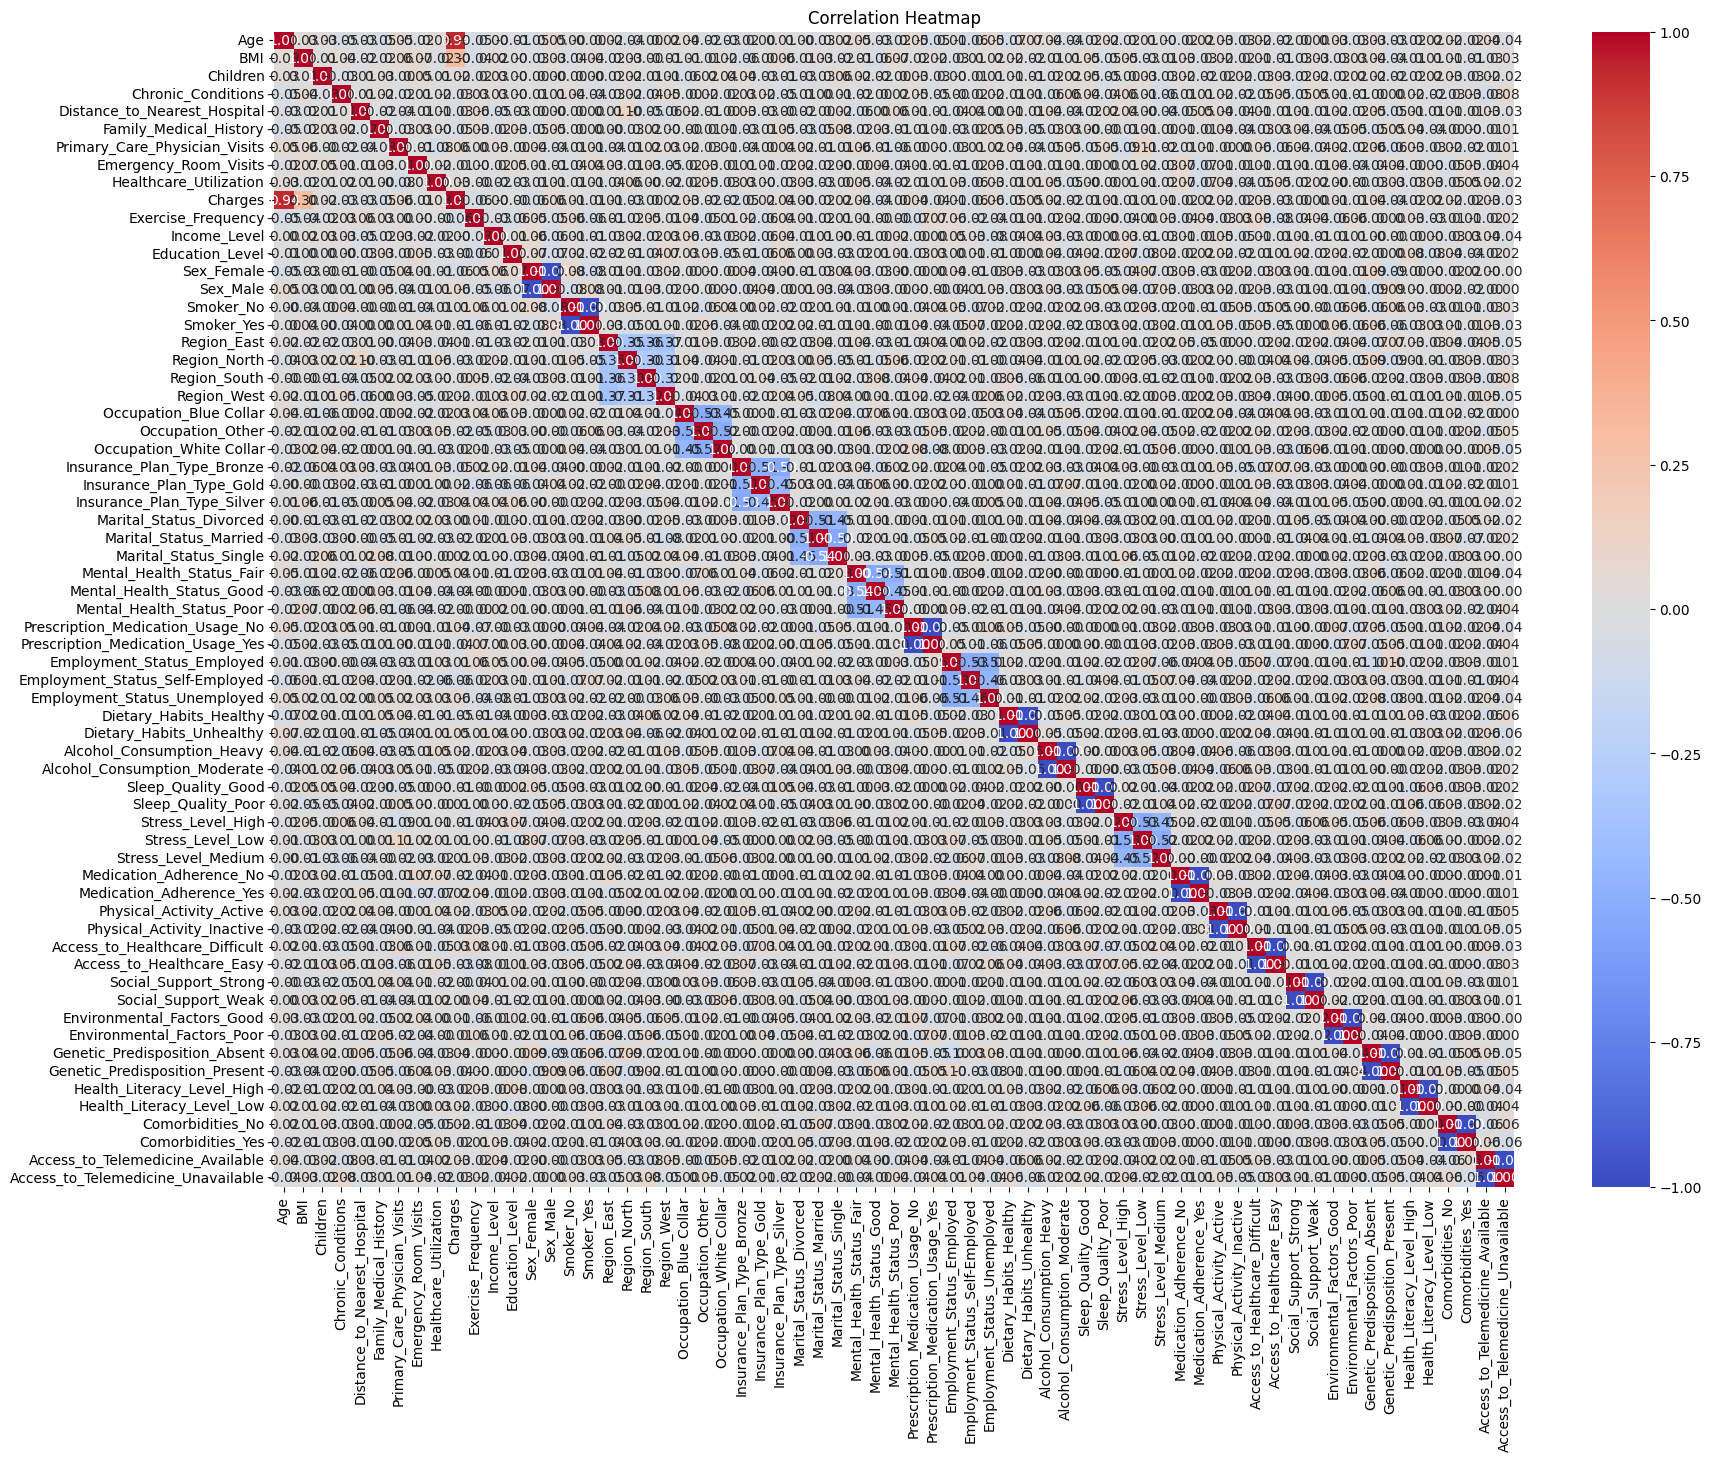

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###  Description of Correlation Matrix

The correlation matrix visualized below represents the pairwise correlations between the numerical features in the dataset. Each cell in the matrix contains a correlation coefficient, ranging from -1 to 1, indicating the strength and direction of the linear relationship between two variables.

### Interpretation of Correlation Coefficients:

- **Positive Correlation (0 to 1)**: A coefficient close to 1 indicates a strong positive linear relationship, meaning as one variable increases, the other tends to increase as well.
  
- **Negative Correlation (-1 to 0)**: A coefficient close to -1 indicates a strong negative linear relationship, meaning as one variable increases, the other tends to decrease.
  
- **No Correlation (0)**: A coefficient close to 0 suggests no linear relationship between the variables.
  
- **Strength of Correlation**: The magnitude of the correlation coefficient indicates the strength of the relationship, with values closer to 1 or -1 representing stronger relationships.

### Interpretation of Heatmap:

The heatmap visualization provides a graphical representation of the correlation matrix, with colors indicating the strength and direction of the correlation. Warmer colors (shades of red) represent positive correlations, while cooler colors (shades of blue) represent negative correlations. The intensity of the color reflects the magnitude of the correlation coefficient.




In [22]:
df_cleaned

Age        BMI  Children  Chronic_Conditions  \
0    56.0  26.787630       0.0                 2.0   
1    69.0  22.063650       4.0                 2.0   
2    46.0  24.036100       2.0                 1.0   
3    32.0  24.229820       2.0                 2.0   
4    60.0  31.784280       0.0                 0.0   
..    ...        ...       ...                 ...   
995  18.0  17.794340       0.0                 1.0   
996  35.0  22.538240       1.0                 1.0   
997  49.0  18.285480       4.0                 2.0   
998  64.0  22.096110       2.0                 0.0   
999  66.0  24.951876       2.0                 1.0   

     Distance_to_Nearest_Hospital  Family_Medical_History  \
0                       12.233110                     0.0   
1                       11.314950                     0.0   
2                       14.294050                     1.0   
3                       18.754090                     0.0   
4                       18.245090                     1.0   
..                            ...                     ...   
995                      3.480209                     0.0   
996                     15.215190                     1.0   
997                      0.316761                     0.0   
998                     11.156200                     1.0   
999                      7.589228                     1.0   

     Primary_Care_Physician_Visits  Emergency_Room_Visits  \
0                         6.000000                    4.0   
1                         2.000000                    2.0   
2                         9.000000                    2.0   
3                         2.000000                    0.0   
4                         2.000000                    2.0   
..                             ...                    ...   
995                       2.000000                    2.0   
996                       2.000000                    4.0   
997                       3.000000                    1.0   
998                       8.000000                    0.0   
999                       4.482105                    2.0   

     Healthcare_Utilization    Charges  ...  Environmental_Factors_Good  \
0                  975.5380  84.787630  ...                        True   
1                 1047.9770  92.063650  ...                        True   
2                  836.3854  71.036100  ...                        True   
3                  927.0653  58.229820  ...                        True   
4                 1260.7970  91.784280  ...                       False   
..                      ...        ...  ...                         ...   
995                932.2167  36.794340  ...                        True   
996               1280.2350  58.538240  ...                        True   
997               1336.6650  69.285480  ...                       False   
998                779.2834  88.096110  ...                        True   
999                467.0529  76.292654  ...                        True   

     Environmental_Factors_Poor  Genetic_Predisposition_Absent  \
0                         False                          False   
1                         False                           True   
2                         False                           True   
3                         False                          False   
4                          True                          False   
..                          ...                            ...   
995                       False                           True   
996                       False                           True   
997                        True                          False   
998                       False                          False   
999                       False                           True   

     Genetic_Predisposition_Present  Health_Literacy_Level_High  \
0                              True                        True   
1                             False                        True

In [30]:
df_cleaned.isnull().sum()

Age                                   0
BMI                                   0
Children                              0
Chronic_Conditions                    0
Distance_to_Nearest_Hospital          0
                                     ..
Health_Literacy_Level_Low             0
Comorbidities_No                      0
Comorbidities_Yes                     0
Access_to_Telemedicine_Available      0
Access_to_Telemedicine_Unavailable    0
Length: 65, dtype: int64

### Model Selection

#### Importing the sklearn libraries

In [97]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### Splitting the dataset

In [84]:

# Splitting Data
X = df_cleaned.drop(columns=['Charges'])
y = df_cleaned['Charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 1. RandomForestRegressor

In [91]:
# Model Selection & Training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)


#### Evaluation Of RandomForestRegressor

In [111]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomForestRegressor:")
print("RandomForestRegressor_Mean_Squared Error:", mse)
print("RandomForestRegressor_Mean_Absolute_error:", mae)
print("RandomForestRegressor_Mean_R-Squared:", r2)

RandomForestRegressor:
RandomForestRegressor_Mean_Squared Error: 4.801537859699303
RandomForestRegressor_Mean_Absolute_error: 1.464544371541826
RandomForestRegressor_Mean_R-Squared: 0.9851838745306236


### 2. LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()
#Training the model
lr.fit(X_train, y_train)


y_pred = model.predict(X_test)


#### Evaluation Of Linear Regression

In [112]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print("Linear Regression_Mean Squared_Error:", mse)
print("Linear Regression_Mean_Absolute_Error:", mae)
print("Linear Regression_R-Squared:", r2)

Linear Regression:
Linear Regression_Mean Squared Error: 4.801537859699303
Linear Regression_Mean_Absolute_error: 1.464544371541826
Linear Regression_R-Squared: 0.9851838745306236


### 3.SVR (Support Vector Regressor)

In [27]:
from sklearn.svm import SVR

In [93]:
svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


#### Evaluation Of SVR

In [113]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr=mean_absolute_error(y_test, y_pred_svr)
r2_score_svr = r2_score(y_test, y_pred_svr)
                        
print("Support Vector Regressor:")
print("SVR_Mean_Squared_Error:", mse_svr)
print("SVR_Mean_Absolute_Error:", mae_svr)
print("SVR_R-squared_Score:", r2_score_svr)

Support Vector Regressor:
SVR_Mean_Squared_Error: 312.6530251622638
SVR_Mean_Absolute_Error: 14.163420420586649
SVR_R-squared_Score: 0.03524525172143689


### 4.GradientBoostingRegressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)



#### Evaluation Of GradientBoostingRegressor

In [115]:
mae_gb_regressor = mean_absolute_error(y_test, y_pred)
mse_gb_regressor = mean_squared_error(y_test, y_pred)

print("GradientBoostingRegressor:")
print("GradientBoostingRegressor_Mean Squared Error:", mse_gb_regressor)
print("GradientBoostingRegressor_Mean Absolute Error:", mae_gb_regressor)
print("GradientBoostingRegressor_R-squared_Score:", r2_score(y_test, y_pred))

GradientBoostingRegressor:
GradientBoostingRegressor_Mean Squared Error: 4.801537859699303
GradientBoostingRegressor_Mean Absolute Error: 1.464544371541826
GradientBoostingRegressor_R-squared_Score: 0.9851838745306236


#### Concluding The Model

In [ ]:
Model                      Mean Squared Error     Mean Absolute Error     R-squared
-------------------------------------------------------------------------------------
RandomForestRegressor      4.8015                 1.4645                  0.9851838745306236
Linear Regression          4.8015                 1.4645                  0.9851838745306236
GradientBoostingRegressor  4.8015                 1.4645                  0.9851838745306236
Support Vector Regressor   312.6530               14.1634                 0.03524525172143689


#### Random Forest Regressor and Gradient Boosting Regressor
perform similarly, as they have identical Mean Squared Error, Mean Absolute Error, and R-squared Score. They both outperform Linear Regression and Support Vector Regressor in terms of predictive performance.

#### Linear Regression and Gradient Boosting Regressor
have the lowest Mean Squared Error, Mean Absolute Error, and highest R-squared Score, indicating that they provide the best overall performance among the models evaluated.

#### Support Vector Regressor 
has significantly higher Mean Squared Error and Mean Absolute Error compared to other models, indicating poorer predictive performance. Its R-squared score is also considerably lower, suggesting that it explains less of the variance in the data compared to other models.

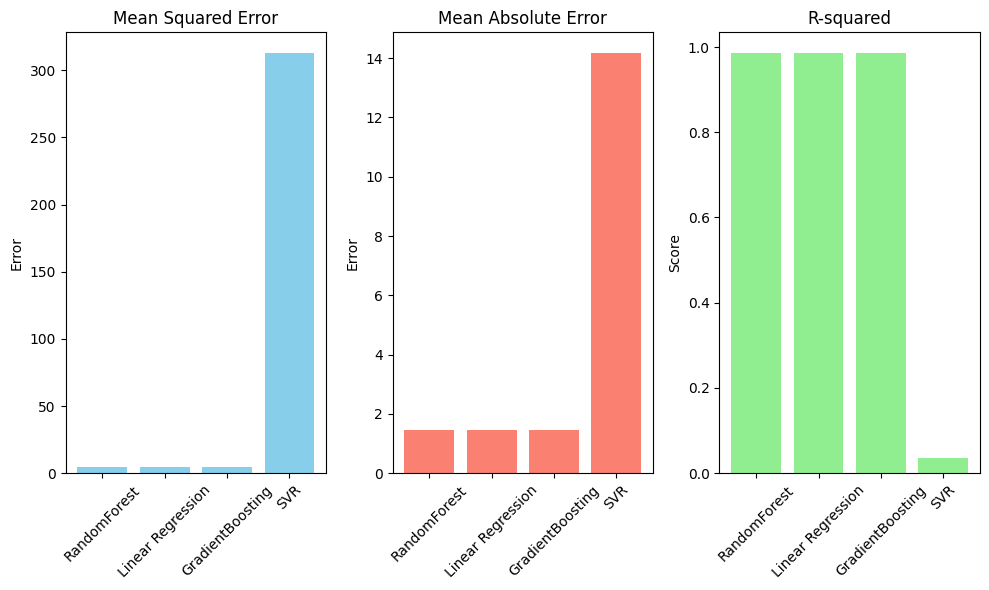

In [120]:
import matplotlib.pyplot as plt

models = ['RandomForest', 'Linear Regression', 'GradientBoosting', 'SVR']
mse = [4.8015, 4.8015, 4.8015, 312.6530]
mae = [1.4645, 1.4645, 1.4645, 14.1634]
r_squared = [0.9852, 0.9852, 0.9852, 0.0352]

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mse, color='skyblue')
plt.title('Mean Squared Error')
plt.xticks(rotation=45)
plt.ylabel('Error')

plt.subplot(1, 3, 2)
plt.bar(models, mae, color='salmon')
plt.title('Mean Absolute Error')
plt.xticks(rotation=45)
plt.ylabel('Error')

plt.subplot(1, 3, 3)
plt.bar(models, r_squared, color='lightgreen')
plt.title('R-squared')
plt.xticks(rotation=45)
plt.ylabel('Score')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


####
Based on the metrics provided for each regression model, it seems like the RandomForestRegressor, Linear Regression, and GradientBoostingRegressor perform similarly, with very low mean squared error (MSE) and mean absolute error (MAE) and high R-squared values, indicating good predictive performance. On the other hand, the Support Vector Regressor (SVR) has significantly higher MSE and MAE and a very low R-squared value, suggesting poorer performance compared to the other models.

### Overall Recommendations and Actionable Insights:

Utilize Random Forest Regressor or Gradient Boosting Regressor for accurate prediction of outcomes.
                                                              
Consider Linear Regression for interpreting linear relationships and identifying key factors affecting outcomes.
    
Exercise caution when using Support Vector Regressor due to its poor performance in this scenario.
    
Continuously refine and update the models with new data to ensure their relevance and accuracy in optimizing resource allocation, healthcare planning, and patient support services.
Collaborate with data scientists and healthcare professionals to further enhance the models and extract actionable insights tailored to the specific needs and challenges of Hospital ABC.